In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('..')
from matplotlib import rc

import utils
import sys, importlib
import matplotlib as mpl
from colors_and_markers import *
# for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino'], 'size': 20})
#rc('text', usetex=False)
#rc('text.latex', preamble=r'''
#    \usepackage{amsmath}
#    \usepackage{bbding}
#    \usepackage{stmaryrd}
#    \usepackage{fourier}
#    \usepackage{fdsymbol}
#''')

importlib.reload(sys.modules['utils'])
get_sequences = utils.get_sequences
convert_bagsize_key = utils.convert_bagsize_key
parse_json = utils.parse_json
get_plot_defaults = utils.get_plot_defaults
make_like_colab = utils.make_like_colab

out = 'plots'
if not os.path.isdir(out):
    os.makedirs(out)

roma_results = True

defaults = get_plot_defaults()
print(defaults)
cmap = mpl.colormaps.get_cmap('tab20')

{'font_size_title': 32, 'font_size_axes': 25, 'font_size_ticks': 22, 'font_size_legend': 10, 'line_width': 3, 'marker_size': 10, 'dpi': 600}


In [127]:
#res = pd.read_csv('results_testing_superansac_scoring.csv')
if roma_results:
    res = pd.read_csv('results_testing_baselines_RoMA.csv')
    resNew = pd.read_csv('results_testing_superansac_RoMA_new.csv')
    res = pd.concat([res, resNew], ignore_index=True)
else:  
    res = pd.read_csv('results_testing_baselines_splg.csv')
    resNew = pd.read_csv('results_testing_superansac_splg_new.csv')
    res = pd.concat([res, resNew], ignore_index=True)


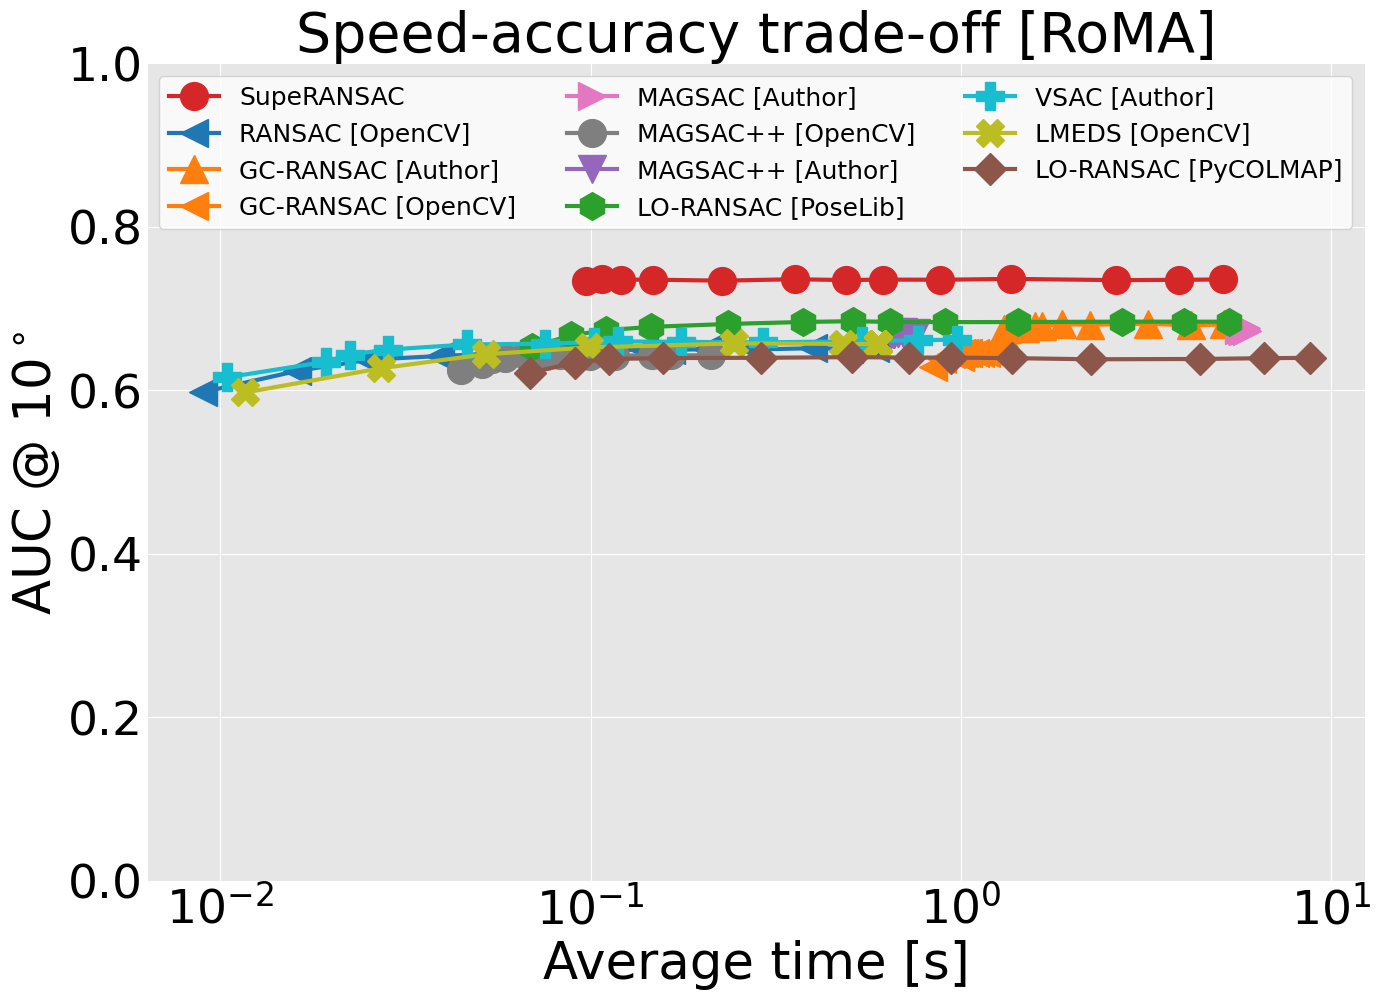

In [128]:
method_names = sorted(list(res['method'].unique()))
fig, ax = plt.subplots(figsize=(14,10))
df = res

max_iters_list = sorted(list(df['maximum_iterations'].unique()))
for count, (m, mm) in enumerate(names_dict.items()):
    sub_df1 = res[res['method'] == m]
    for sampler in list(sub_df1["sampler"].unique()):
        sub_df2 = sub_df1[sub_df1['sampler'] == sampler]
        for scoring in list(sub_df2["scoring"].unique()):
            sub_df3 = sub_df2[sub_df2['scoring'] == scoring]
            for threshold in list(sub_df3["threshold"].unique()):
                sub_df4 = sub_df3[sub_df3['threshold'] == threshold]
                for grid_density in list(sub_df4["neighborhood_size"].unique()):
                    sub_df = sub_df4[sub_df4['neighborhood_size'] == grid_density]
                    aucs = []
                    avg_time = []

                    #if len(sub_df['scene']) < 2:
                    #    continue
                    
                    #for db in sub_df['dataset'].unique():
                    #    auc = sub_df[(sub_df['dataset'] == db) & (sub_df['maximum_iterations'] == 1000)]['auc_Rt10'].values[0] / 100
                    #    print(m, db, auc)

                    for n_iters in max_iters_list:
                        ci = sub_df[sub_df['maximum_iterations'] == n_iters]
                        if any(np.isnan(np.array(ci['auc_Rt10'].values))):
                            continue
                        auc = ci['auc_Rt10'].values.mean() / 100
                        time1 = ci['avg_time'].values.mean()
                        aucs.append(auc)
                        avg_time.append(time1)
                        
                    m2 = m
                    ls = '-'


                    ax.semilogx(np.array(avg_time), 
                            np.array(aucs),
                            linestyle=ls, 
                            marker=markers_dict[m2],
                            markersize=20 if 'pycolmap' not in m2.lower() else 16,
                            #c=cmap(count), 
                            c=colormap_dict[m2],
                            linewidth=defaults['line_width'], 
                            label=mm)
ax.set_xlabel('Average time [s]', fontsize=defaults['font_size_axes']+12)
ax.set_ylabel('AUC @ $10^\circ$', fontsize=defaults['font_size_axes']+12)
ax.set_ylim([0.0, 1.0])
#ax.set_ylim([0., 0.82])
ax.xaxis.set_tick_params(labelsize=defaults[ 'font_size_ticks']+12)
ax.yaxis.set_tick_params(labelsize=defaults[ 'font_size_ticks']+12)

ax.grid('on')
    
ax.legend(ncol=3, prop={'size': 18})

fig.tight_layout()
fig.subplots_adjust(bottom=0.15)
if roma_results:
    ax.set_title('Speed-accuracy trade-off [RoMA]', fontsize= defaults['font_size_title']+8)
else:
    ax.set_title('Speed-accuracy trade-off [SP+LG]', fontsize= defaults['font_size_title']+8)
make_like_colab(fig,ax)
#_lg = ax.get_legend()
#_lg.remove()

if roma_results:
    plt.savefig(f'plots/essential_matrix_roma.pdf'.format(out), bbox_inches='tight', dpi=defaults['dpi'])
else:
    plt.savefig(f'plots/essential_matrix_splg.pdf'.format(out), bbox_inches='tight', dpi=defaults['dpi'])



In [129]:
method_names = sorted(list(res['method'].unique()))

method_map = { "GC-RANSAC github": "GC-RSC [Author]",
              "MAGSAC github": "MAGSAC [Author]",
              "MAGSAC++ github": "MAGSAC++ [Author]",
              "poselib": "LO-RSC [Poselib]",
              "pycolmap": "LO-RSC [PyCOLMAP]",
              "RANSAC OpenCV": "RANSAC [OpenCV]",
              "LMEDS OpenCV": "LMEDS [OpenCV]",
              "superansac (MAGSAC)": "SupeRANSAC",
              "GCRANSAC OpenCV": "GC-RSC [OpenCV]",
              "MAGSAC OpenCV": "MAGSAC++ [OpenCV]",
              "vsac": "VSAC [Author]" }

max_iters_list = sorted(list(df['maximum_iterations'].unique()))
for count, (m, mm) in enumerate(names_dict.items()):
    sub_df1 = res[res['method'] == m]
    for sampler in list(sub_df1["sampler"].unique()):
        sub_df2 = sub_df1[sub_df1['sampler'] == sampler]
        for scoring in list(sub_df2["scoring"].unique()):
            sub_df3 = sub_df2[sub_df2['scoring'] == scoring]
            for threshold in list(sub_df3["threshold"].unique()):
                sub_df4 = sub_df3[sub_df3['threshold'] == threshold]
                for grid_density in list(sub_df4["neighborhood_size"].unique()):
                    sub_df = sub_df4[sub_df4['neighborhood_size'] == grid_density]
                    aucs = []
                    avg_time = []

                    ci = sub_df[sub_df['maximum_iterations'] == 1000]

                    if any(np.isnan(np.array(ci['auc_Rt10'].values))):
                        continue
                    auc = ci['auc_Rt10'].values.mean() / 100
                    time1 = ci['avg_time'].values.mean()
                    aucs.append(auc)
                    avg_time.append(time1)
                    
                    print(f"{method_map[m]} & {ci['auc_Rt5'].values.mean() / 100:.2f} & {ci['auc_Rt10'].values.mean() / 100:.2f} & {ci['auc_Rt20'].values.mean() / 100:.2f} & {ci['med_error'].values.mean():.2f} & {ci['avg_time'].values.mean():.2f} \\\\")

                    


SupeRANSAC & 0.61 & 0.74 & 0.83 & 1.04 & 0.62 \\
RANSAC [OpenCV] & 0.51 & 0.65 & 0.76 & 1.32 & 0.17 \\
GC-RSC [Author] & 0.54 & 0.68 & 0.79 & 1.20 & 1.66 \\
GC-RSC [OpenCV] & 0.51 & 0.65 & 0.76 & 1.26 & 1.04 \\
MAGSAC [Author] & 0.53 & 0.67 & 0.79 & 1.25 & 5.93 \\
MAGSAC++ [OpenCV] & 0.50 & 0.64 & 0.76 & 1.30 & 0.09 \\
MAGSAC++ [Author] & 0.53 & 0.67 & 0.78 & 1.26 & 0.66 \\
LO-RSC [Poselib] & 0.55 & 0.68 & 0.80 & 1.19 & 0.64 \\
VSAC [Author] & 0.52 & 0.66 & 0.78 & 1.24 & 0.12 \\
LMEDS [OpenCV] & 0.52 & 0.66 & 0.77 & 1.29 & 0.60 \\
LO-RSC [PyCOLMAP] & 0.49 & 0.64 & 0.77 & 1.29 & 0.94 \\


/tmp/ipykernel_809643/2902518092.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)  # Use the fixed plot size


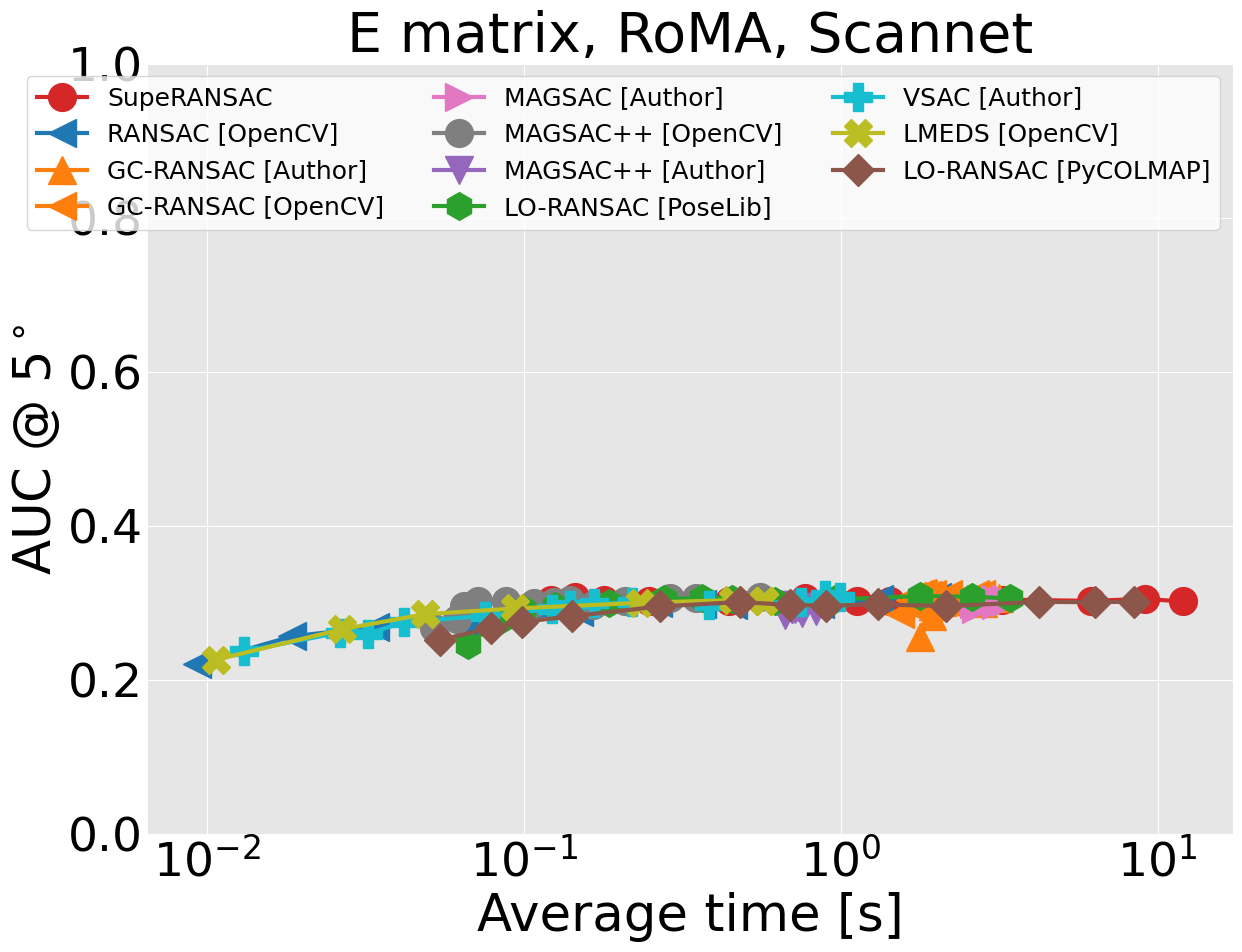

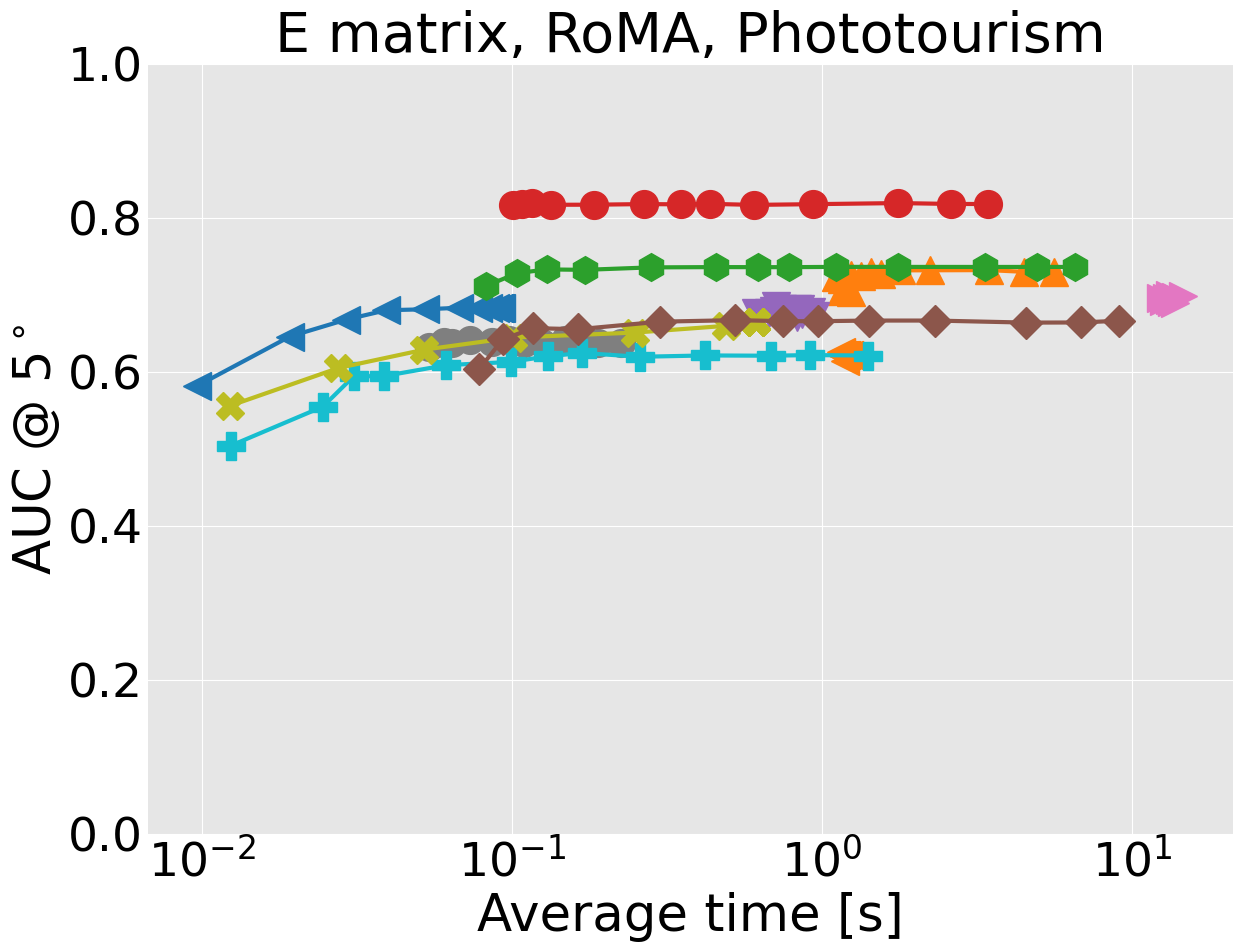

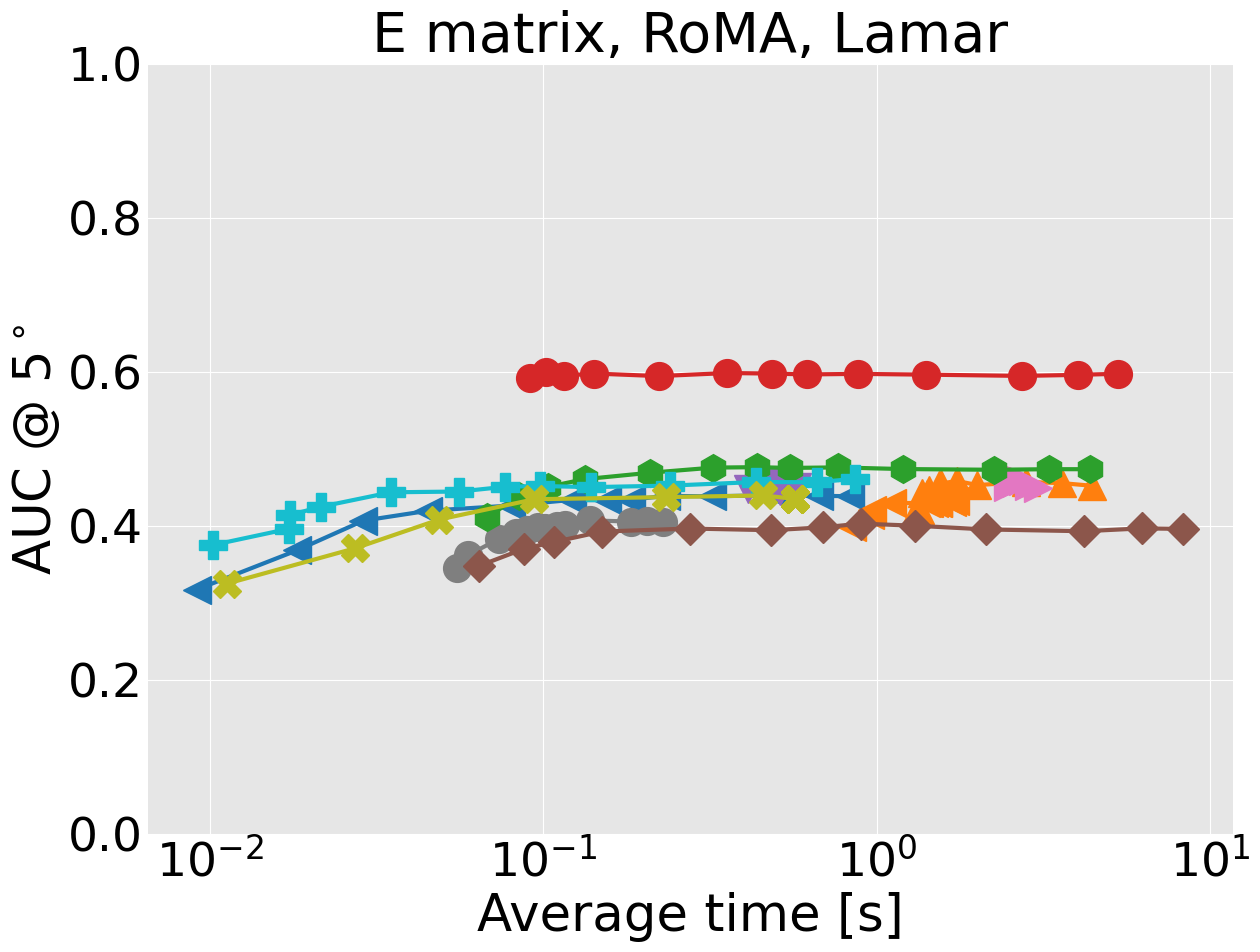

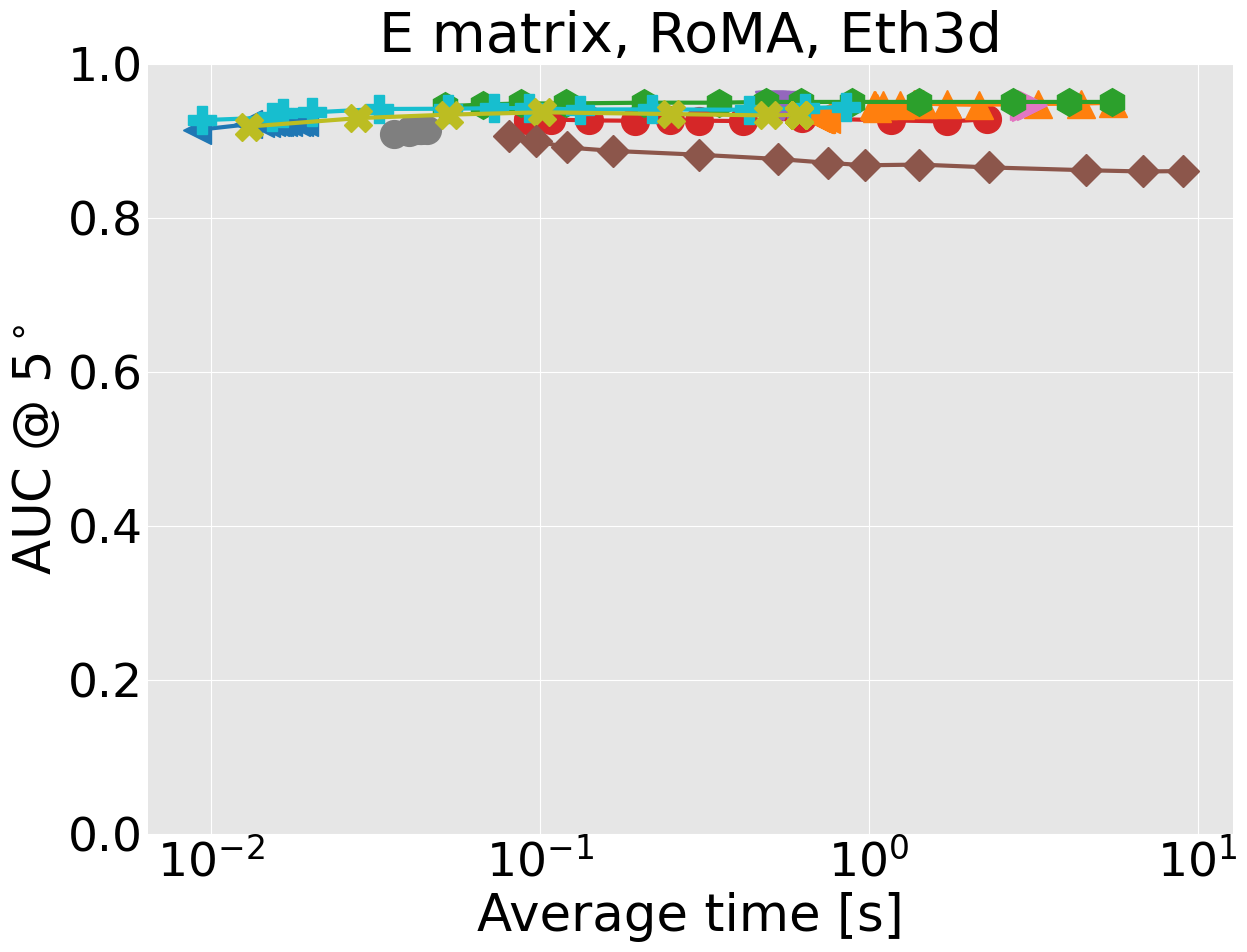

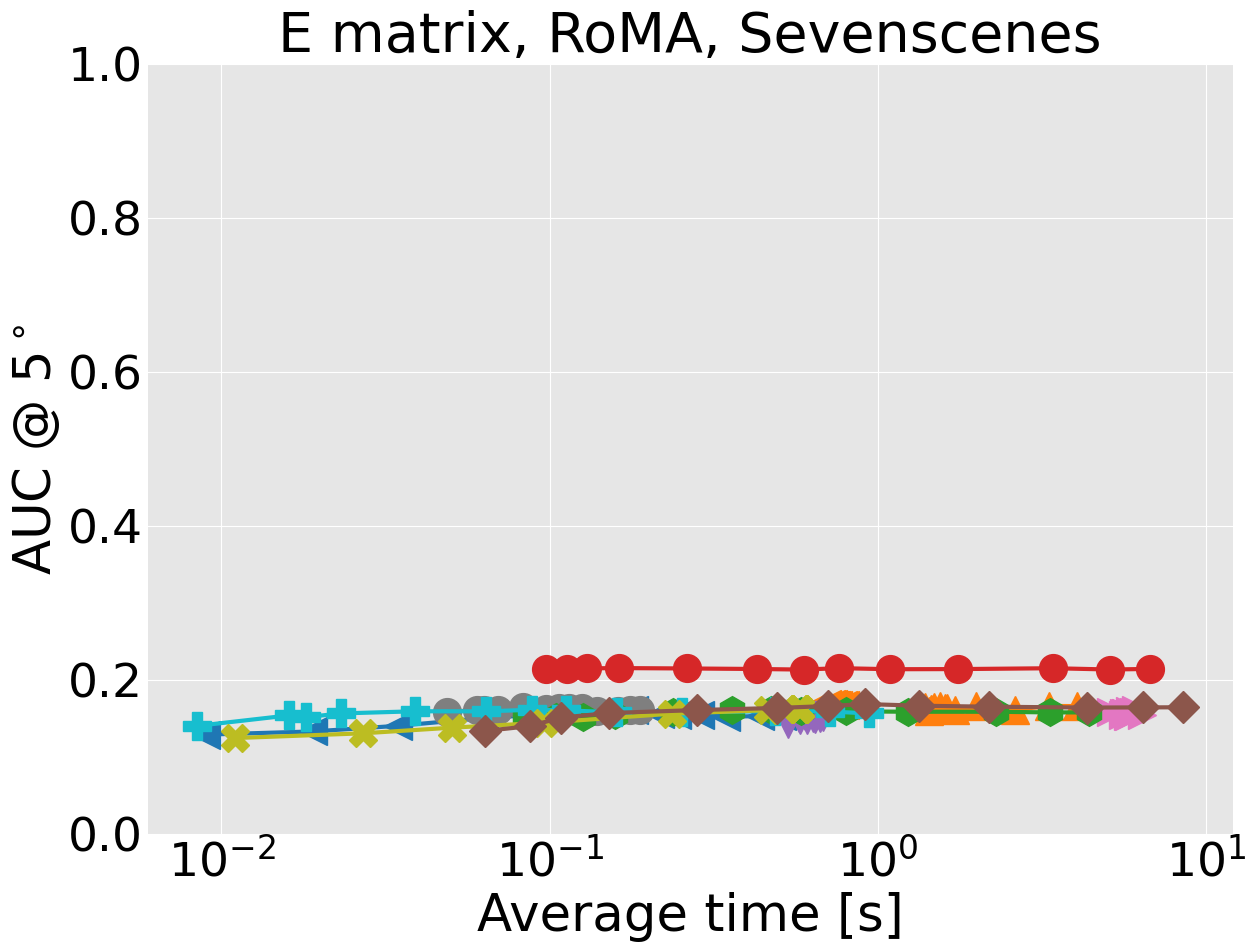

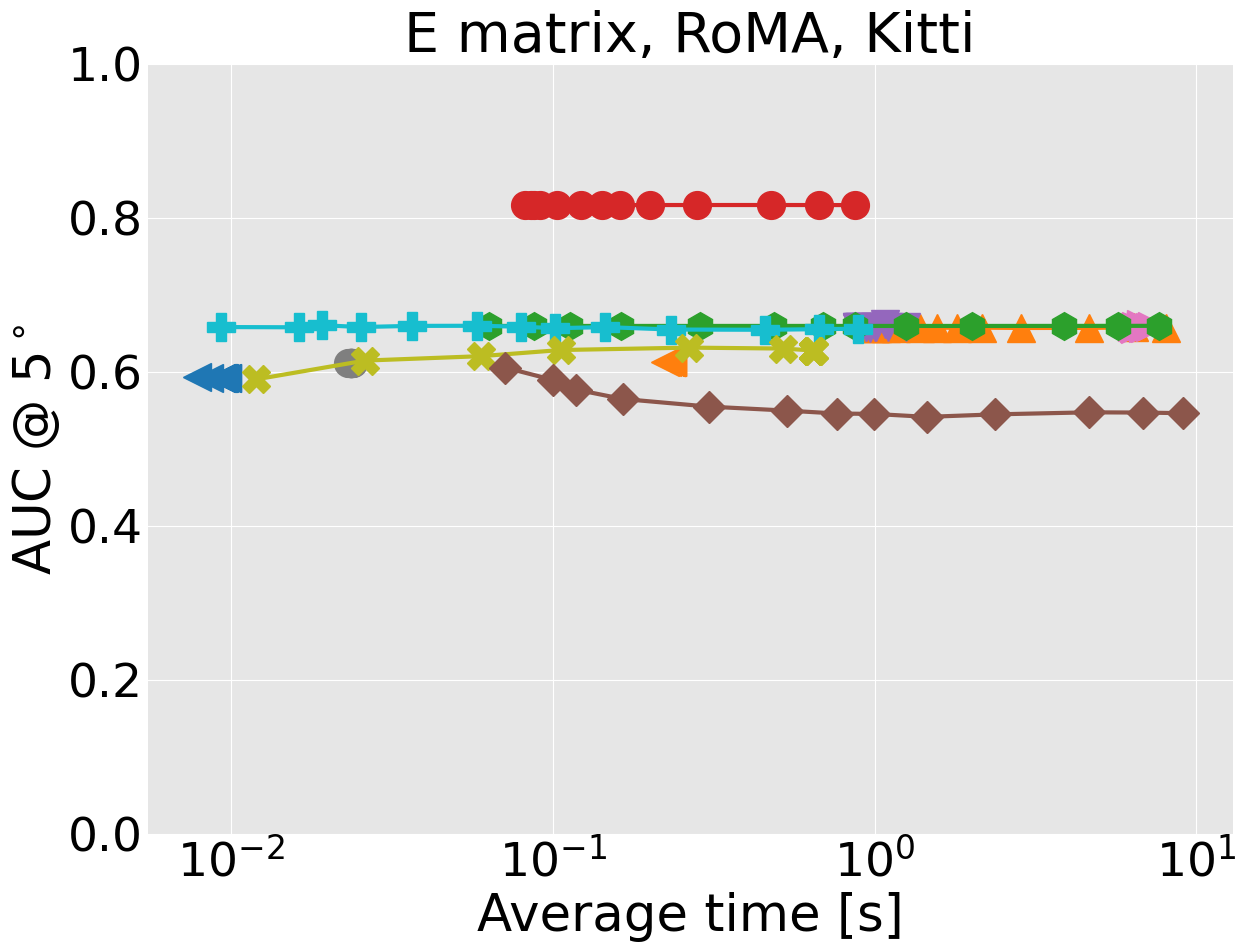

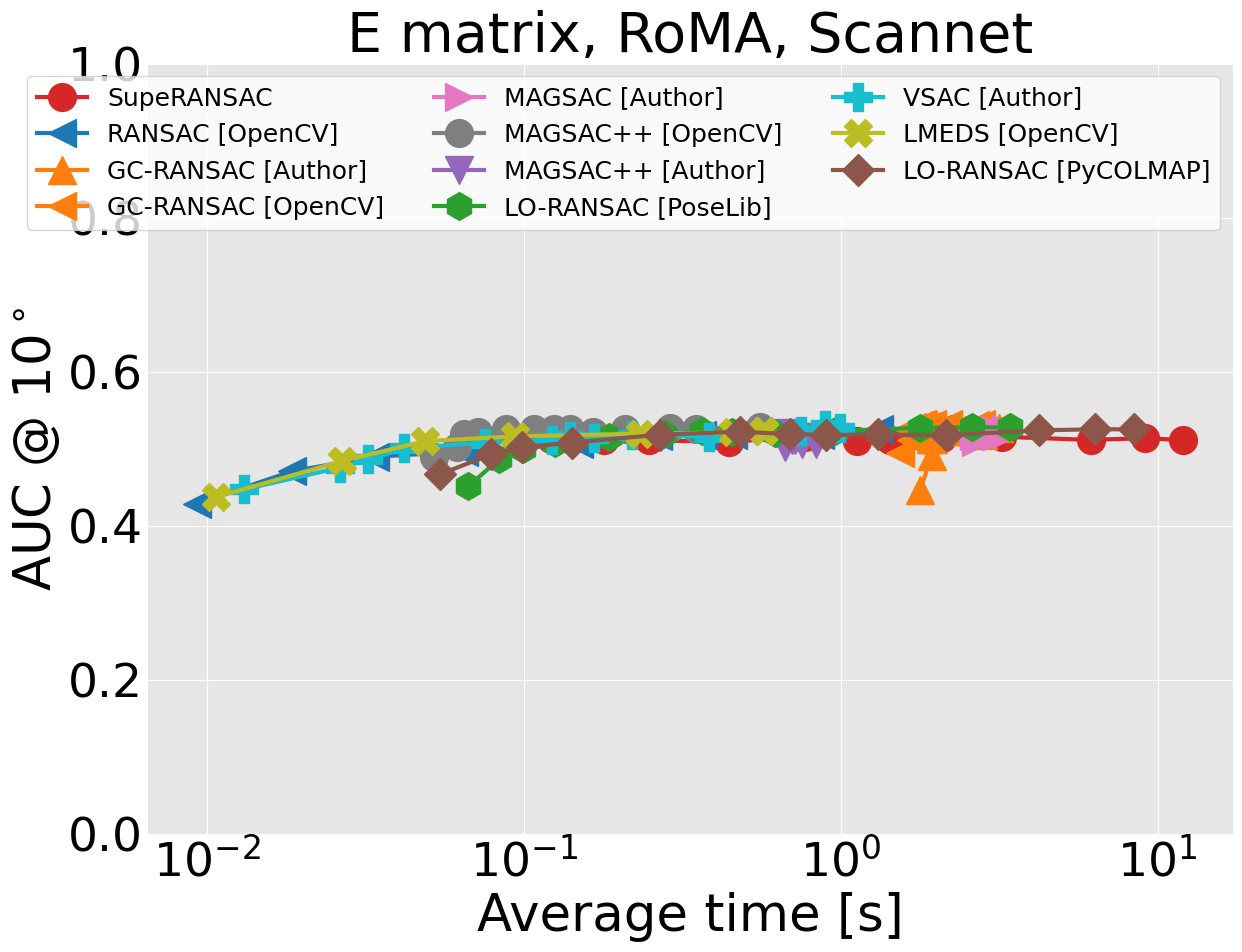

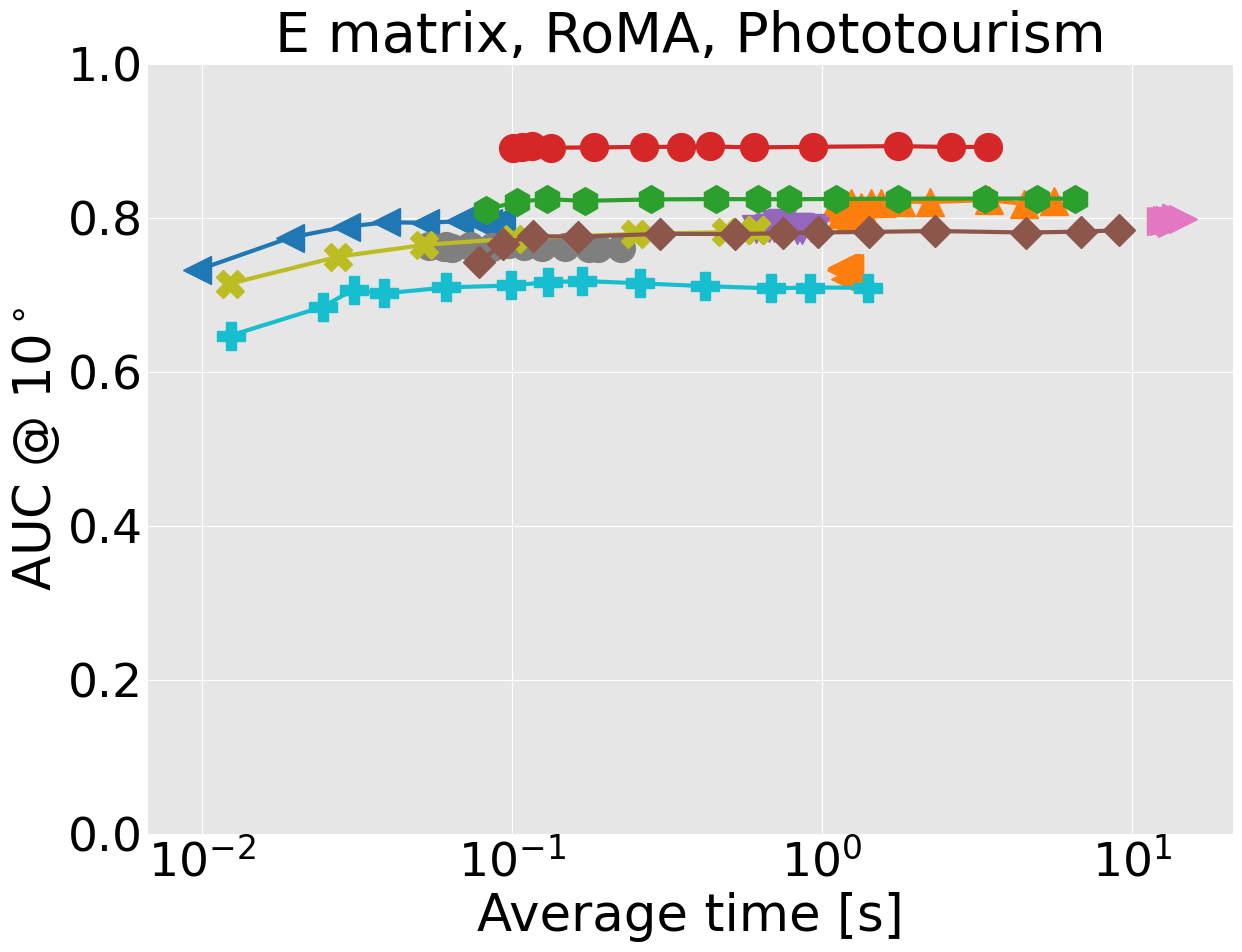

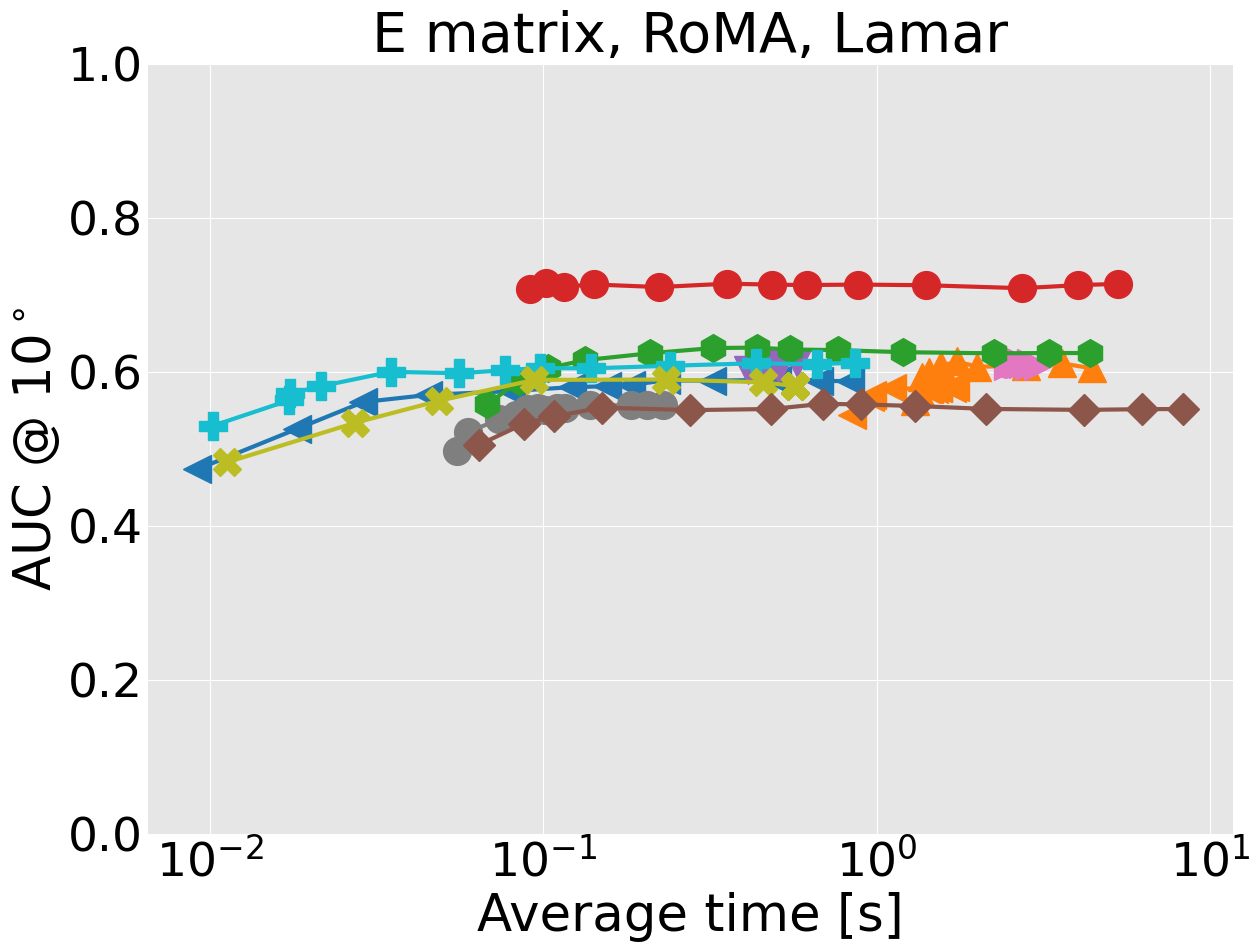

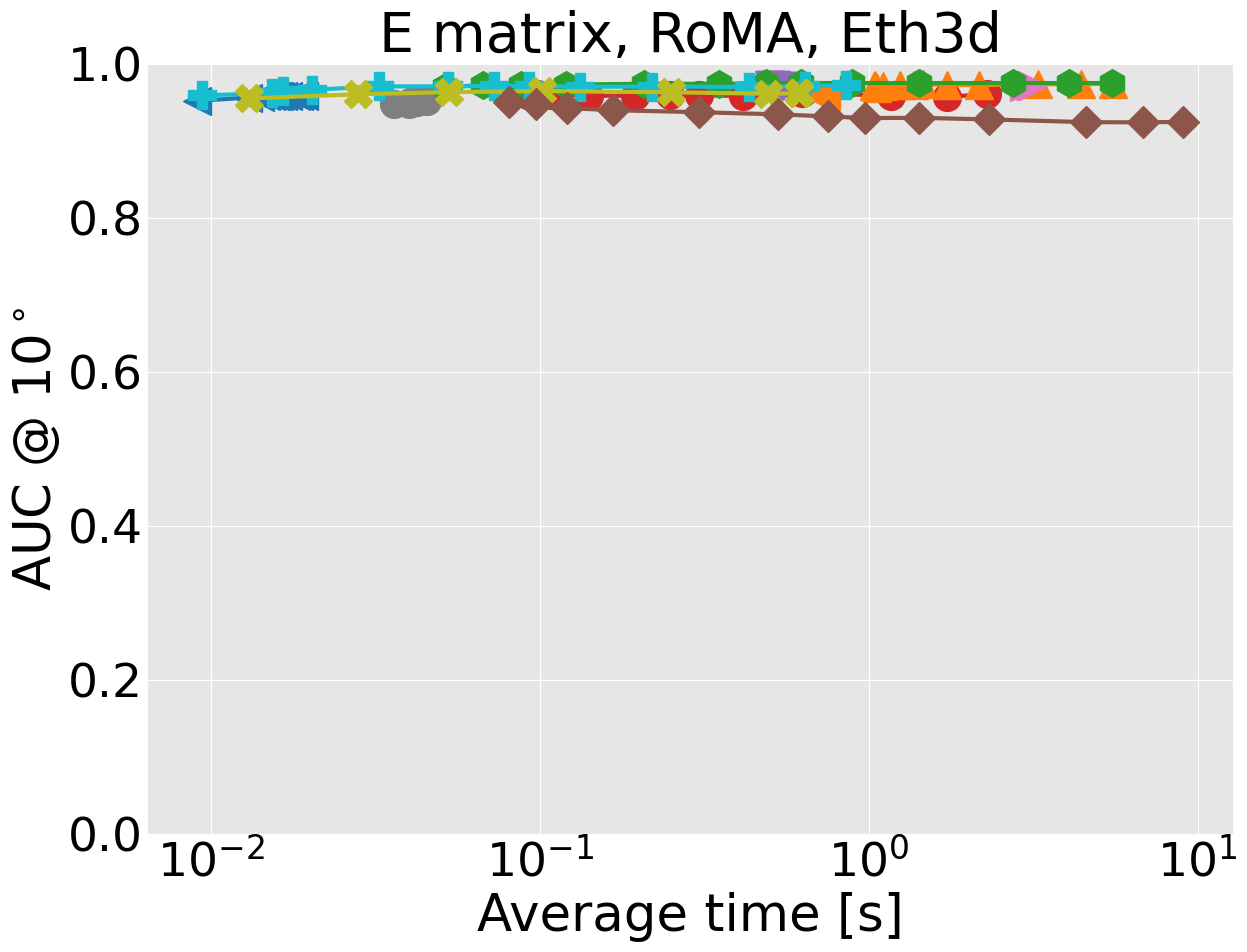

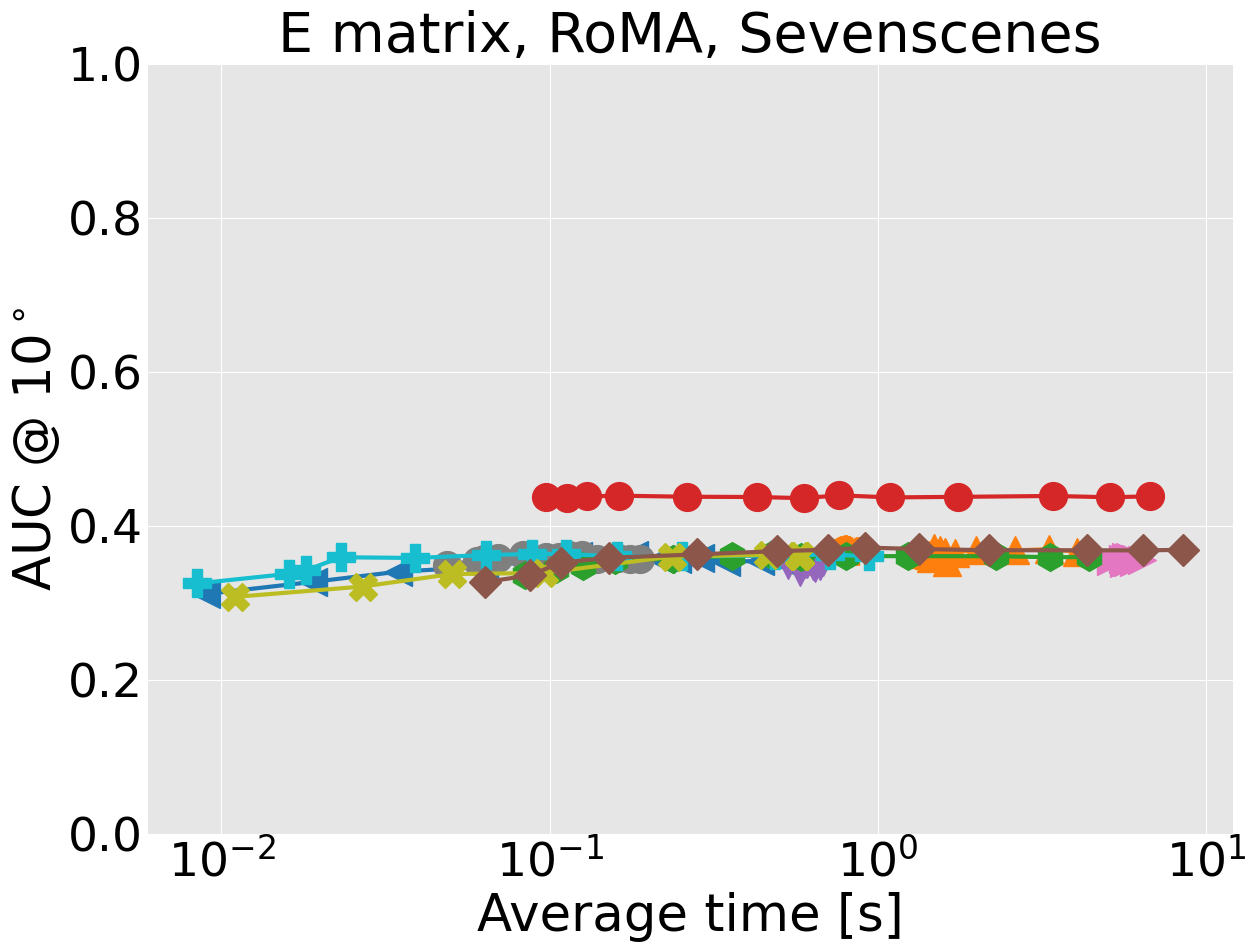

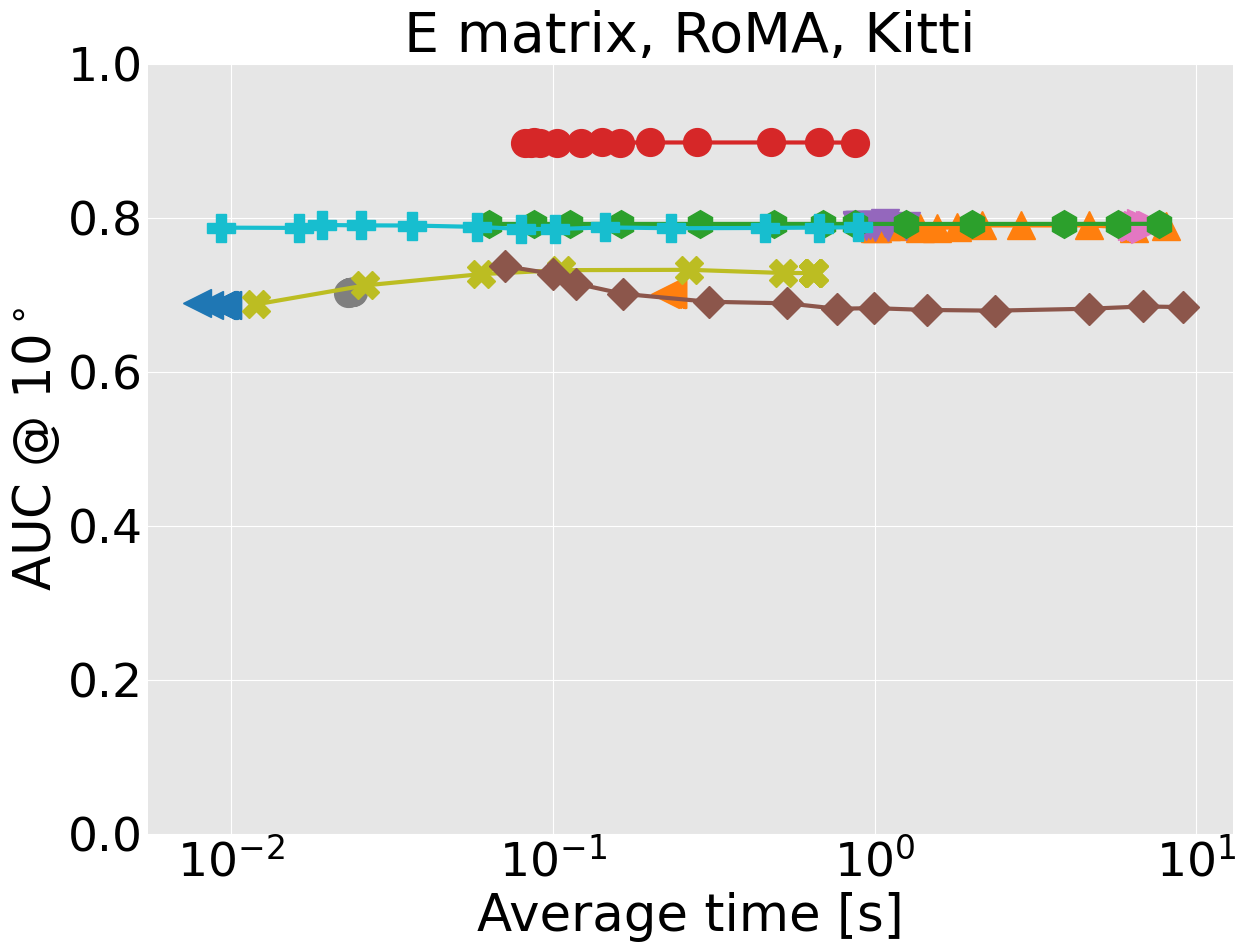

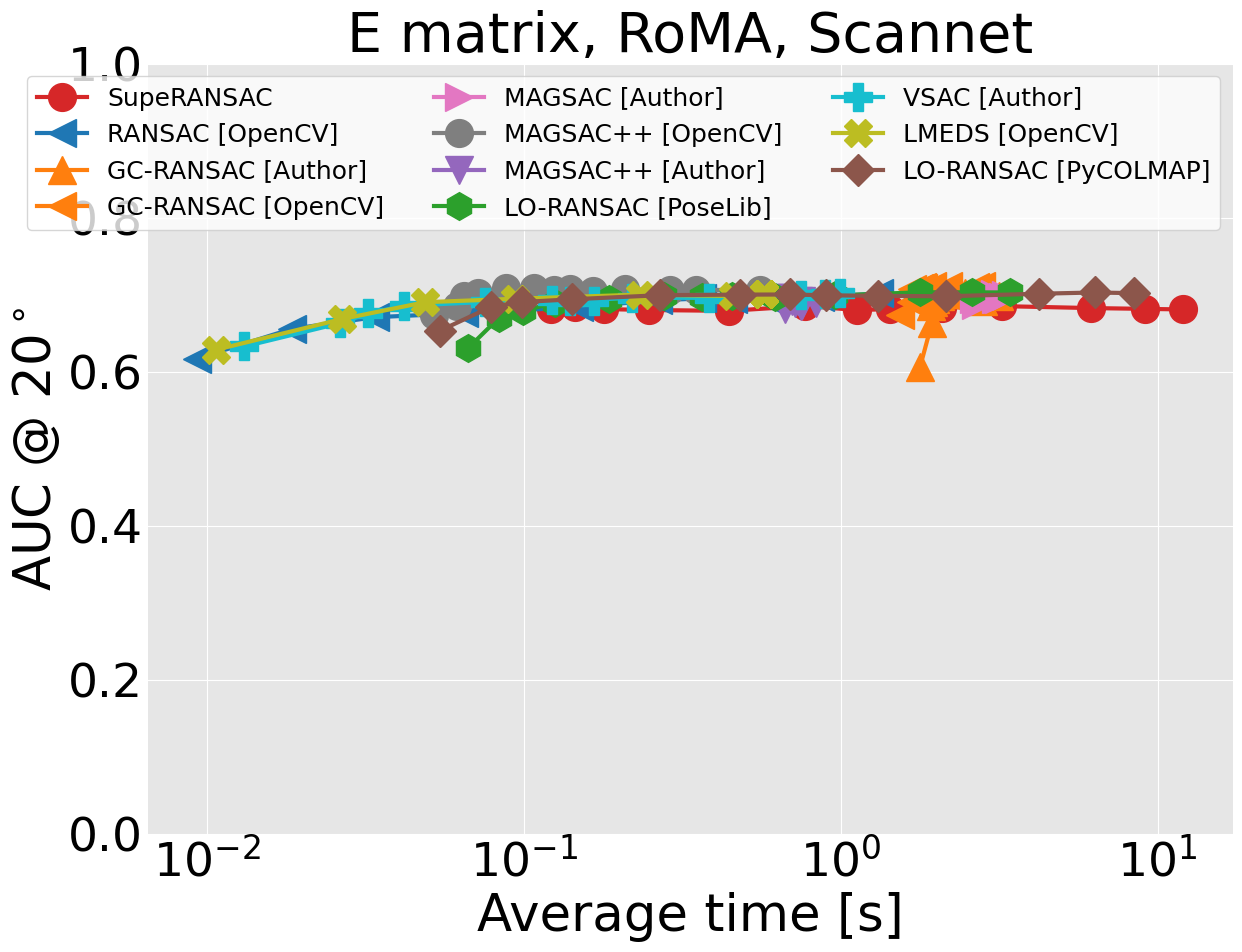

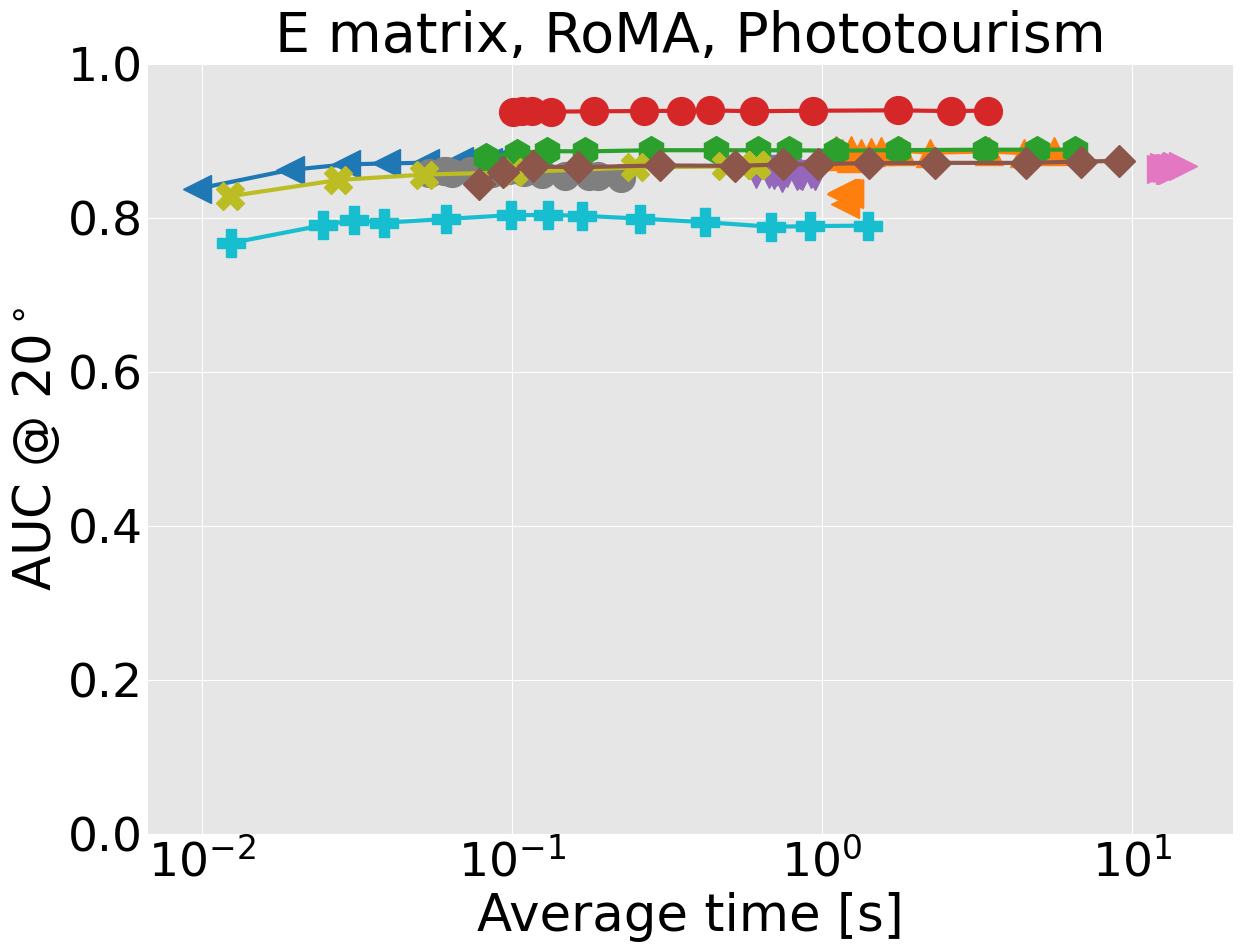

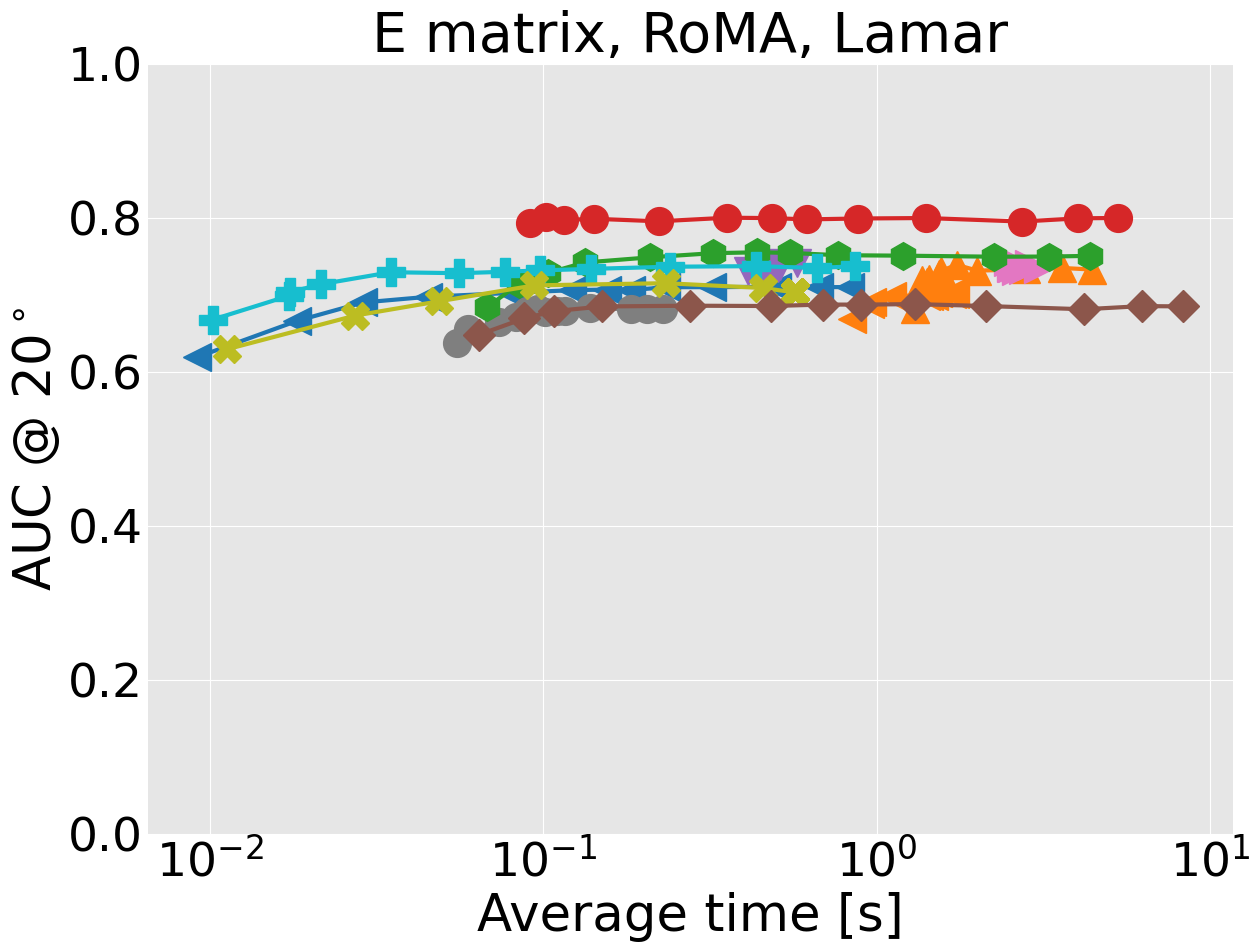

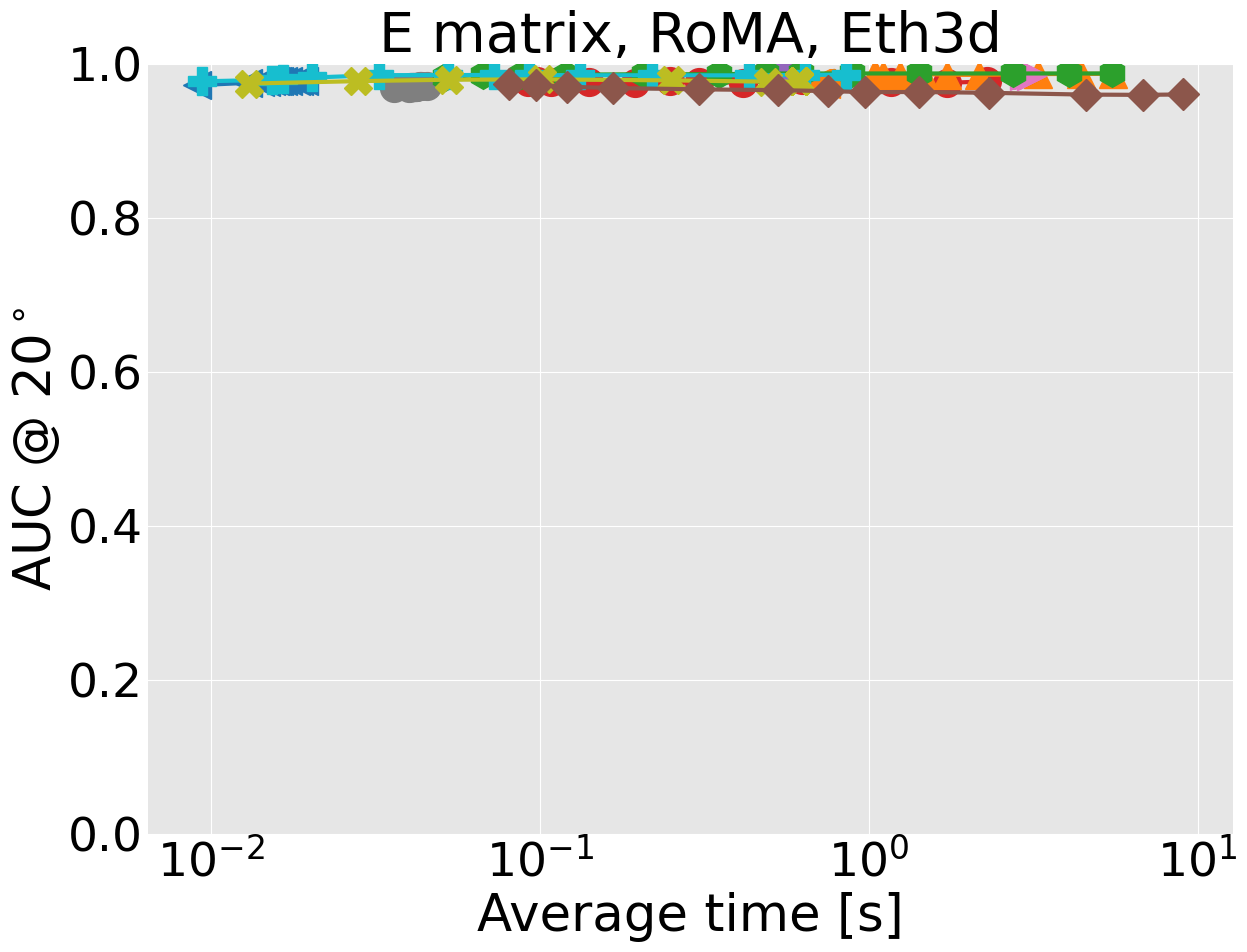

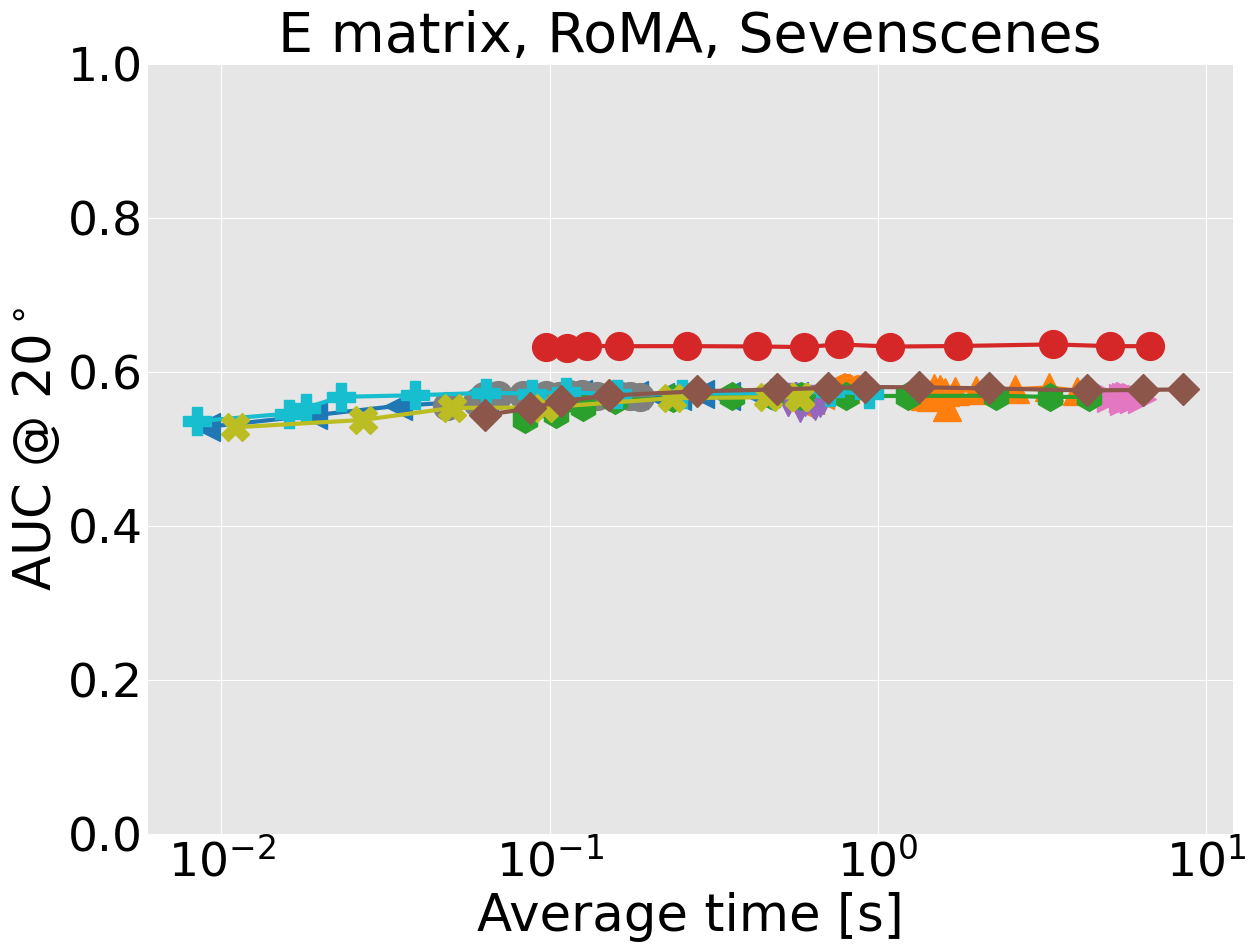

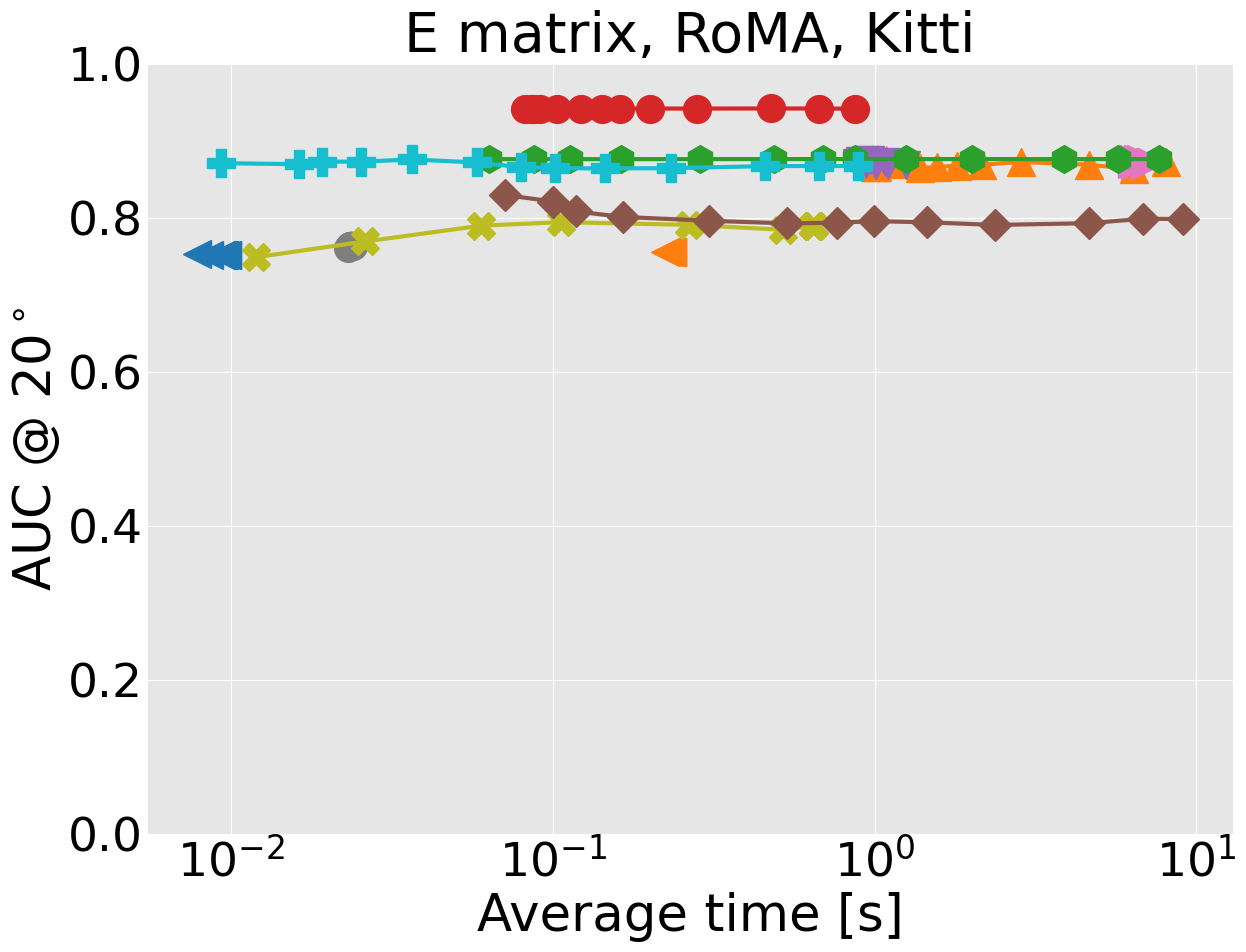

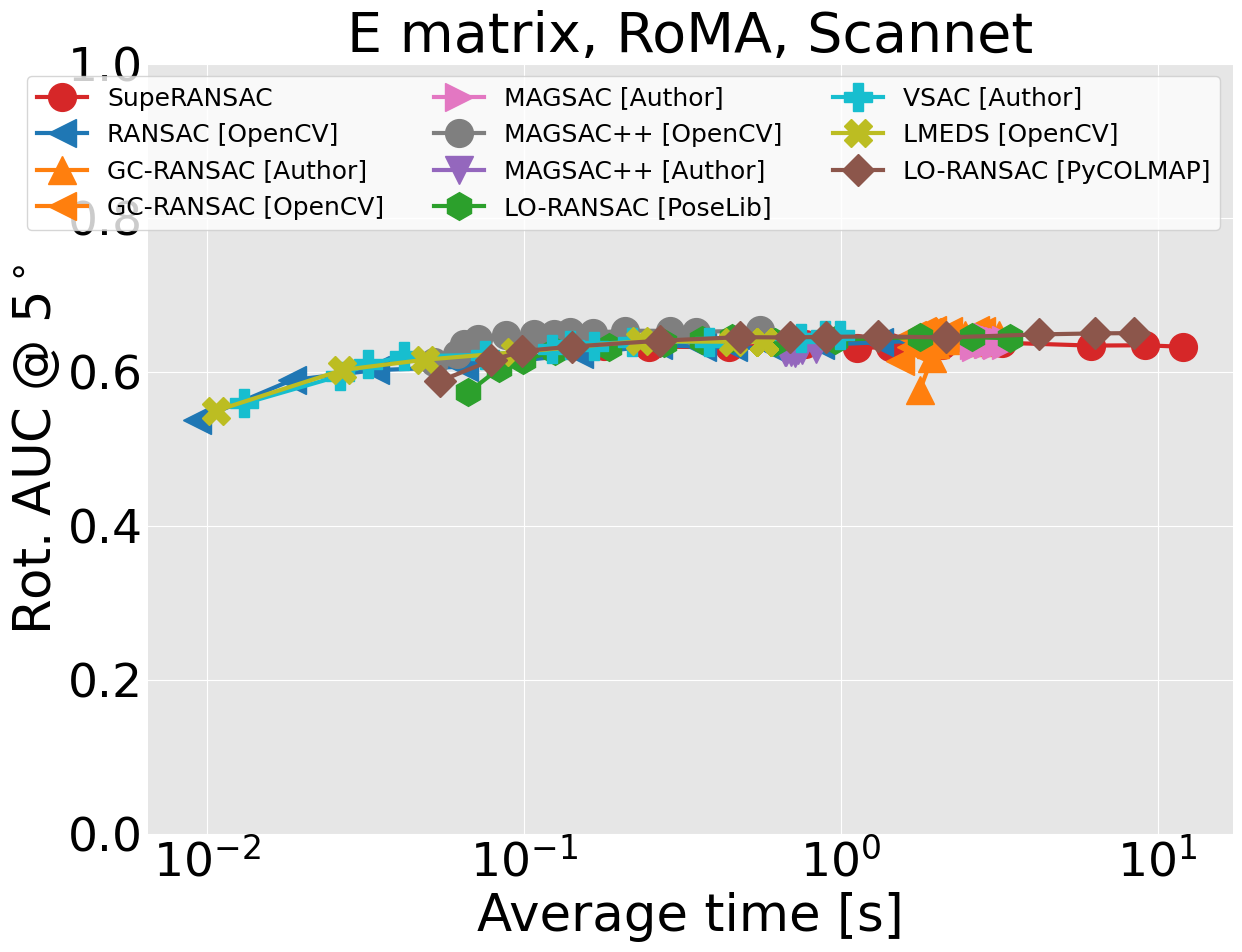

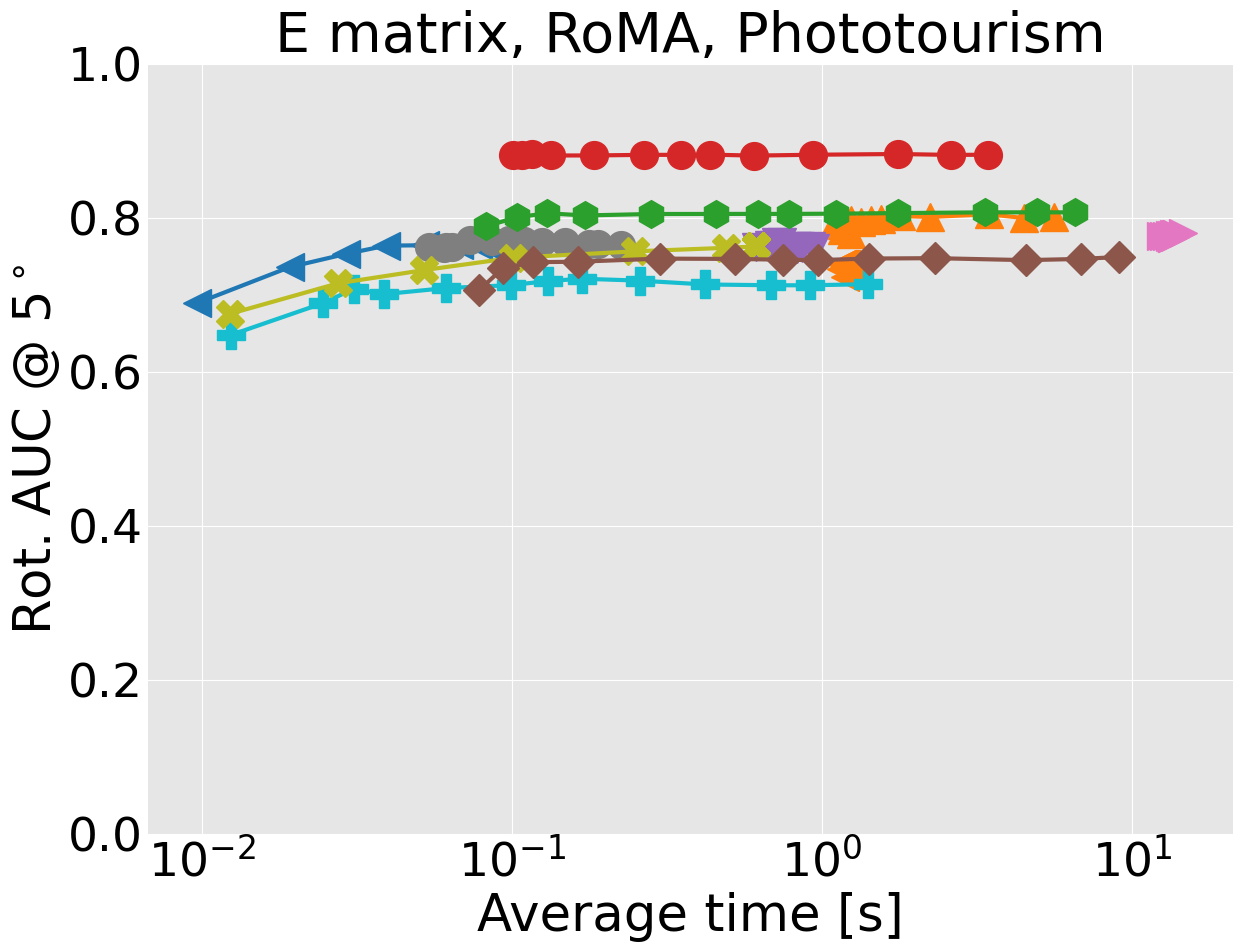

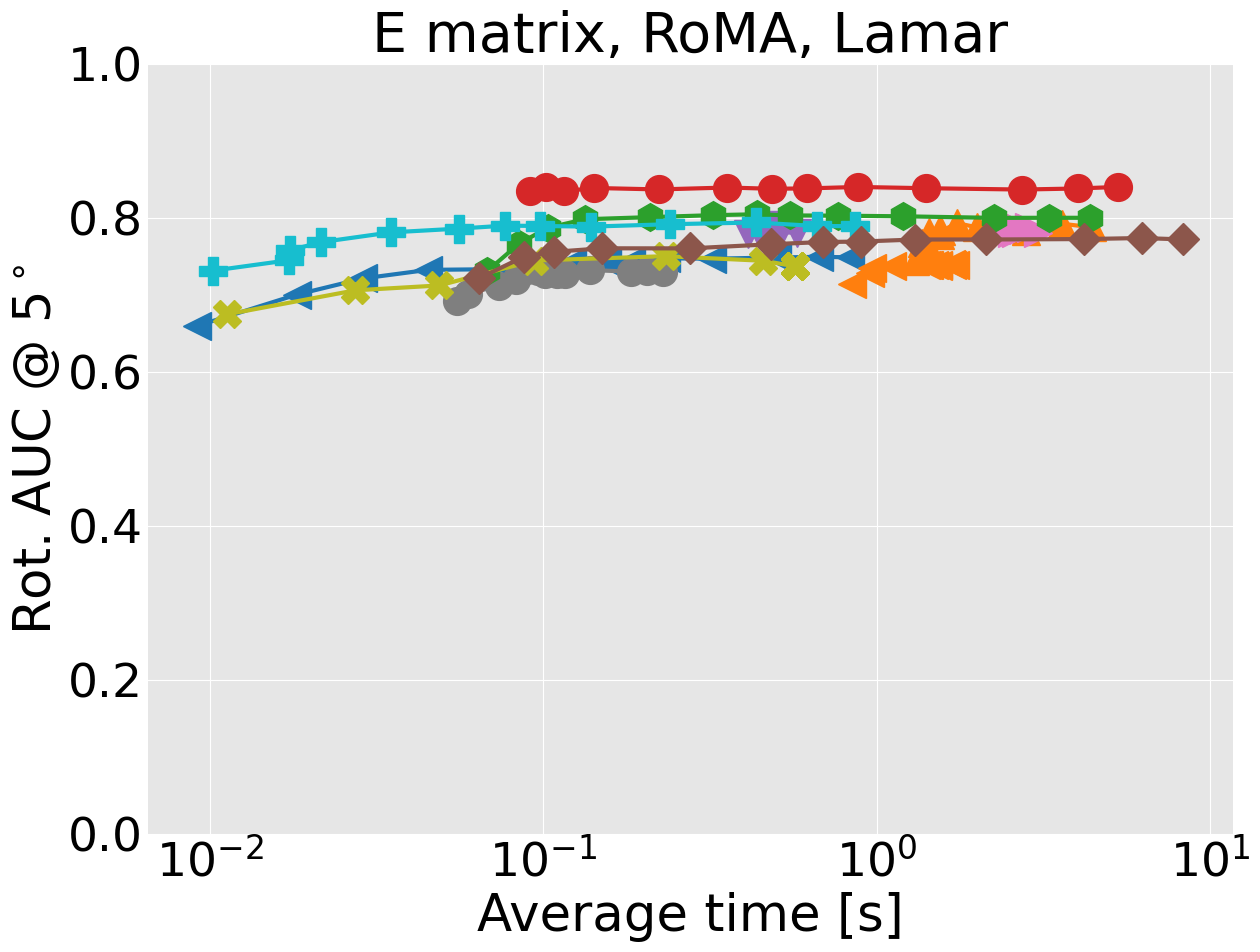

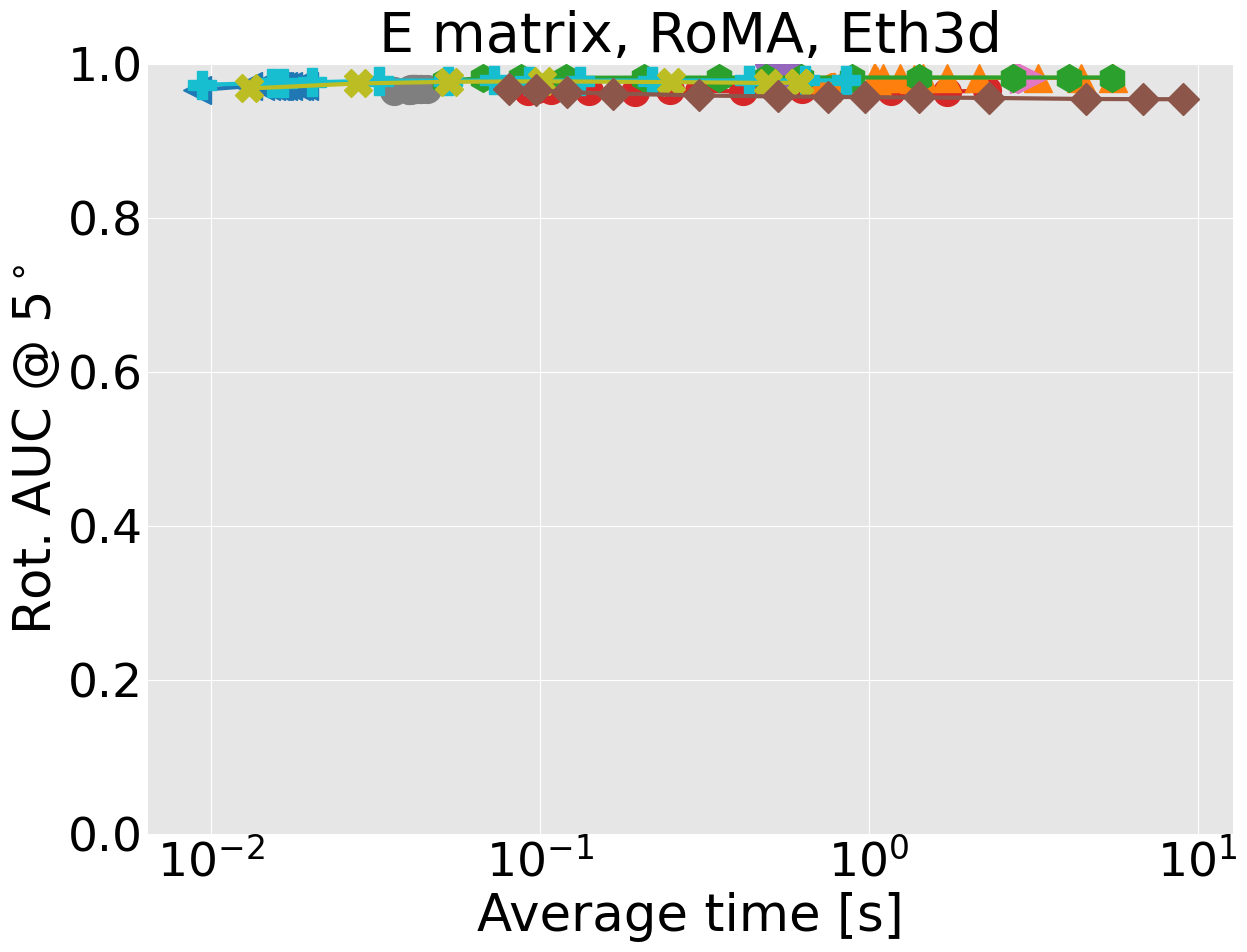

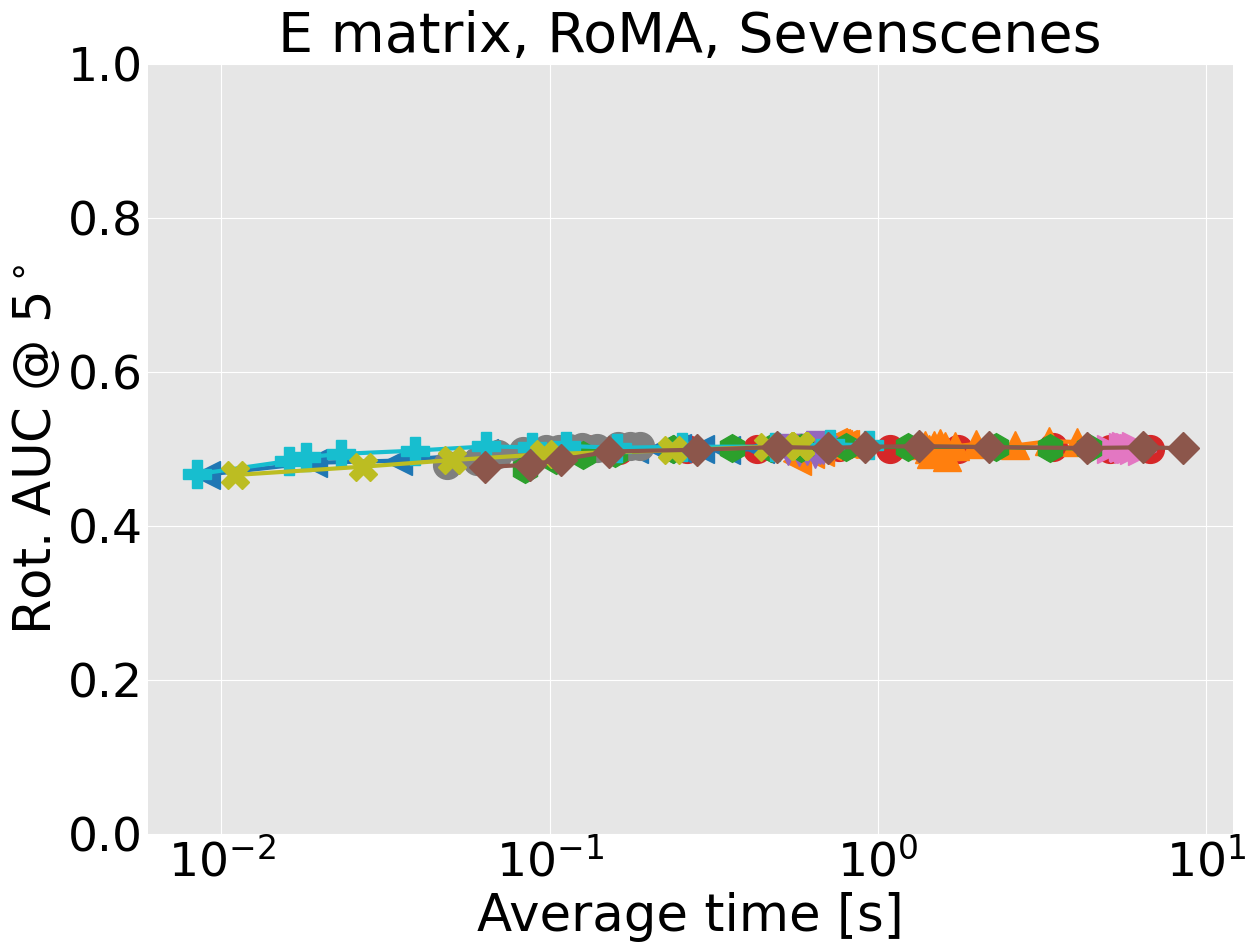

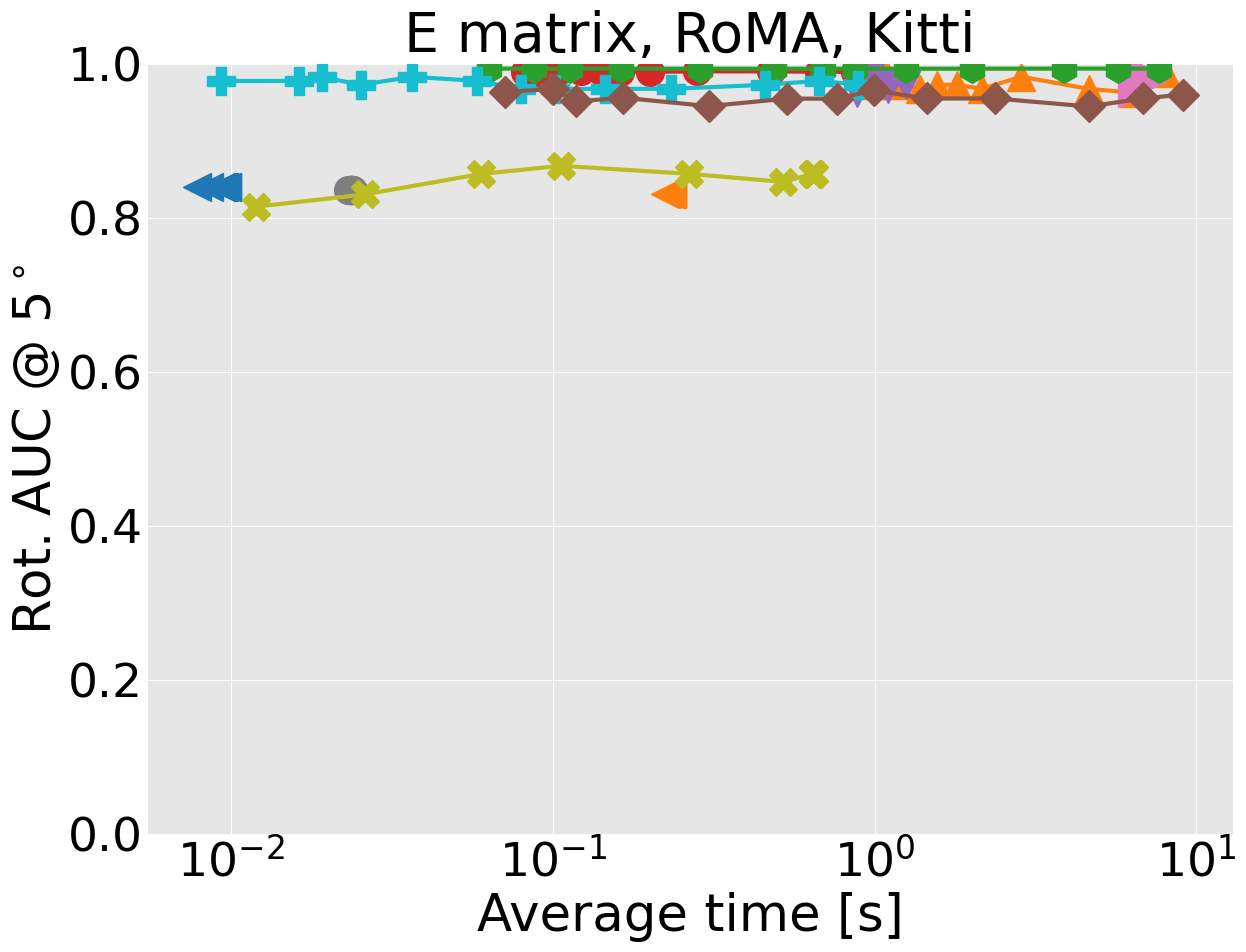

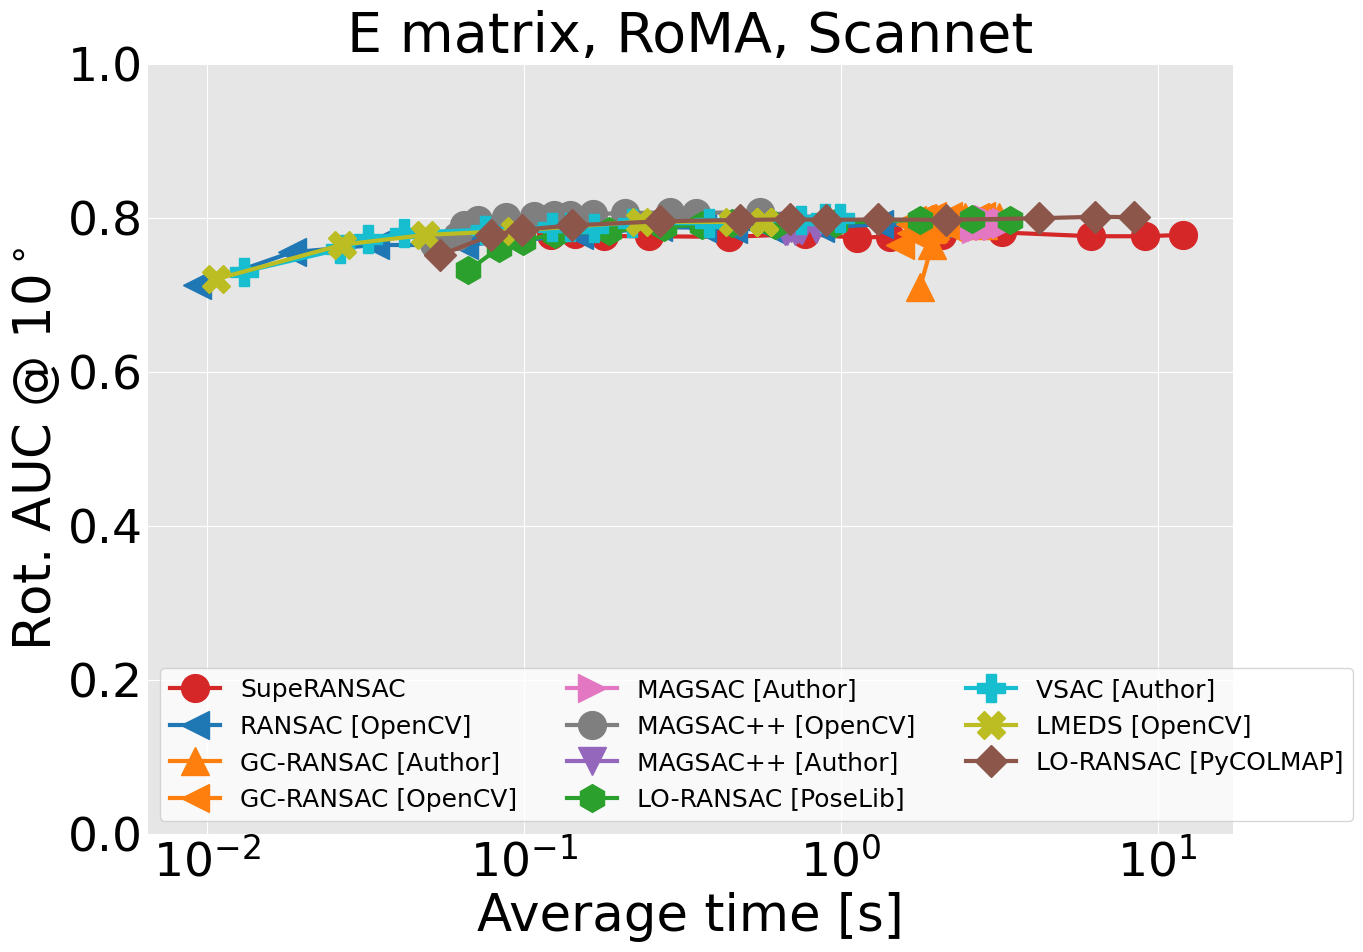

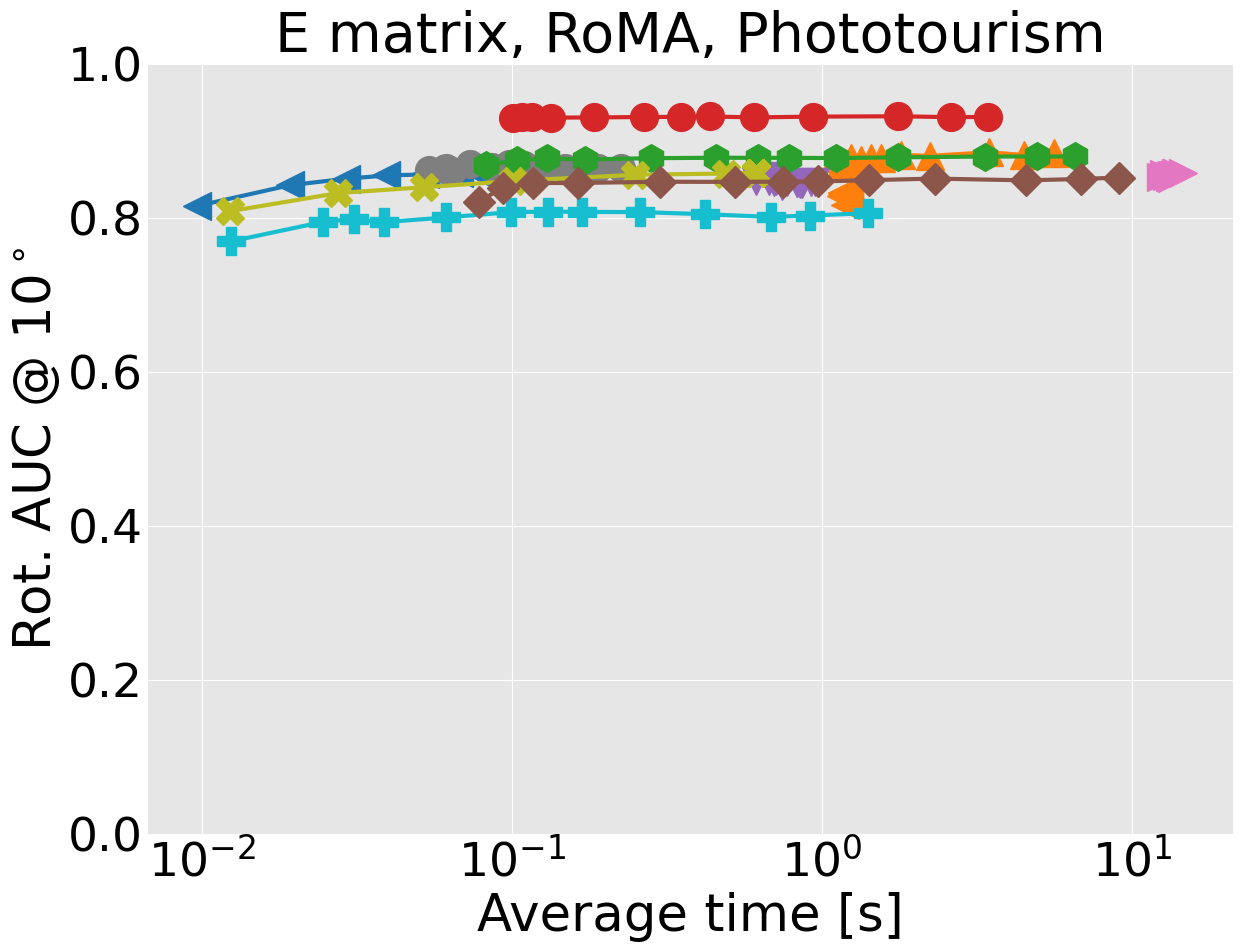

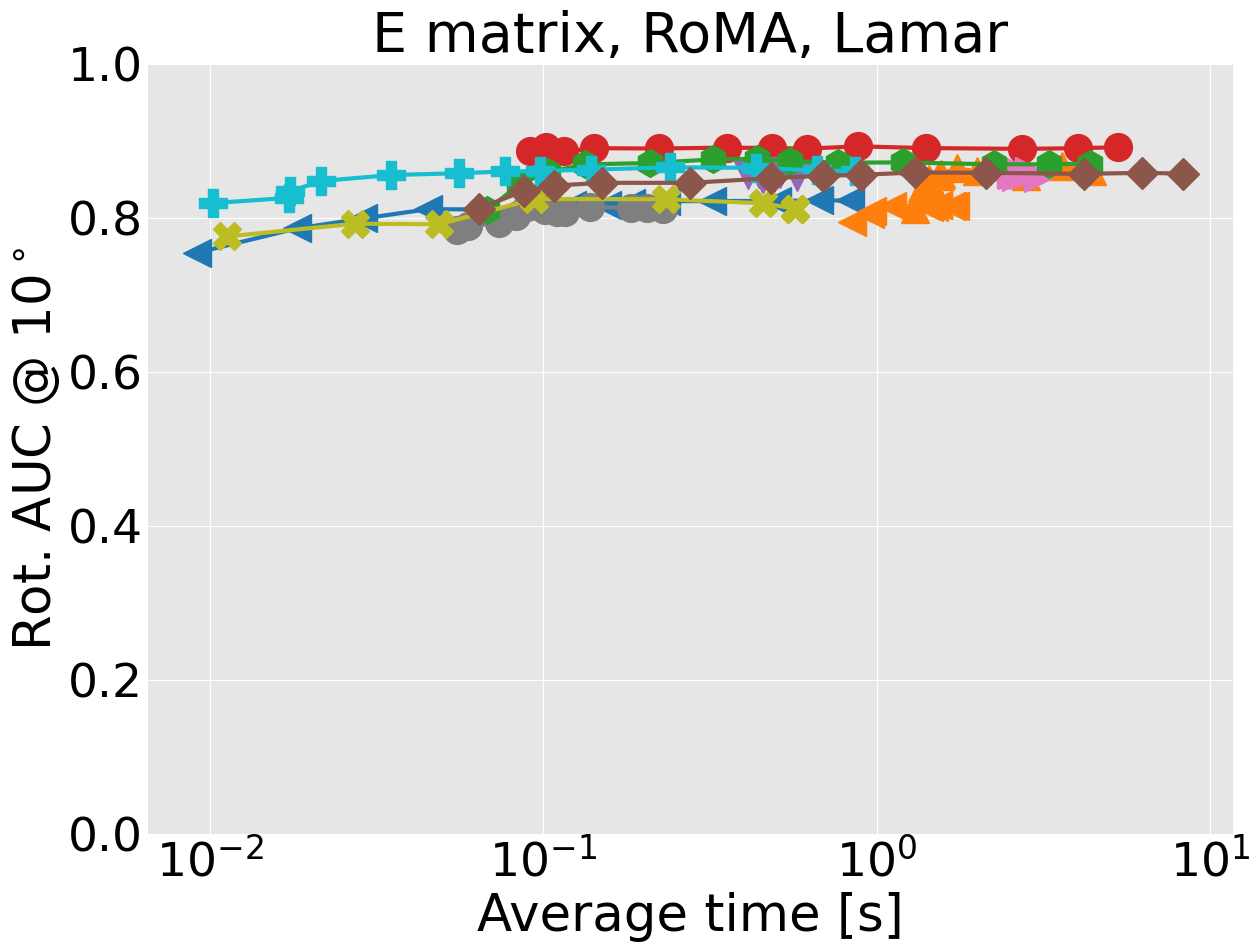

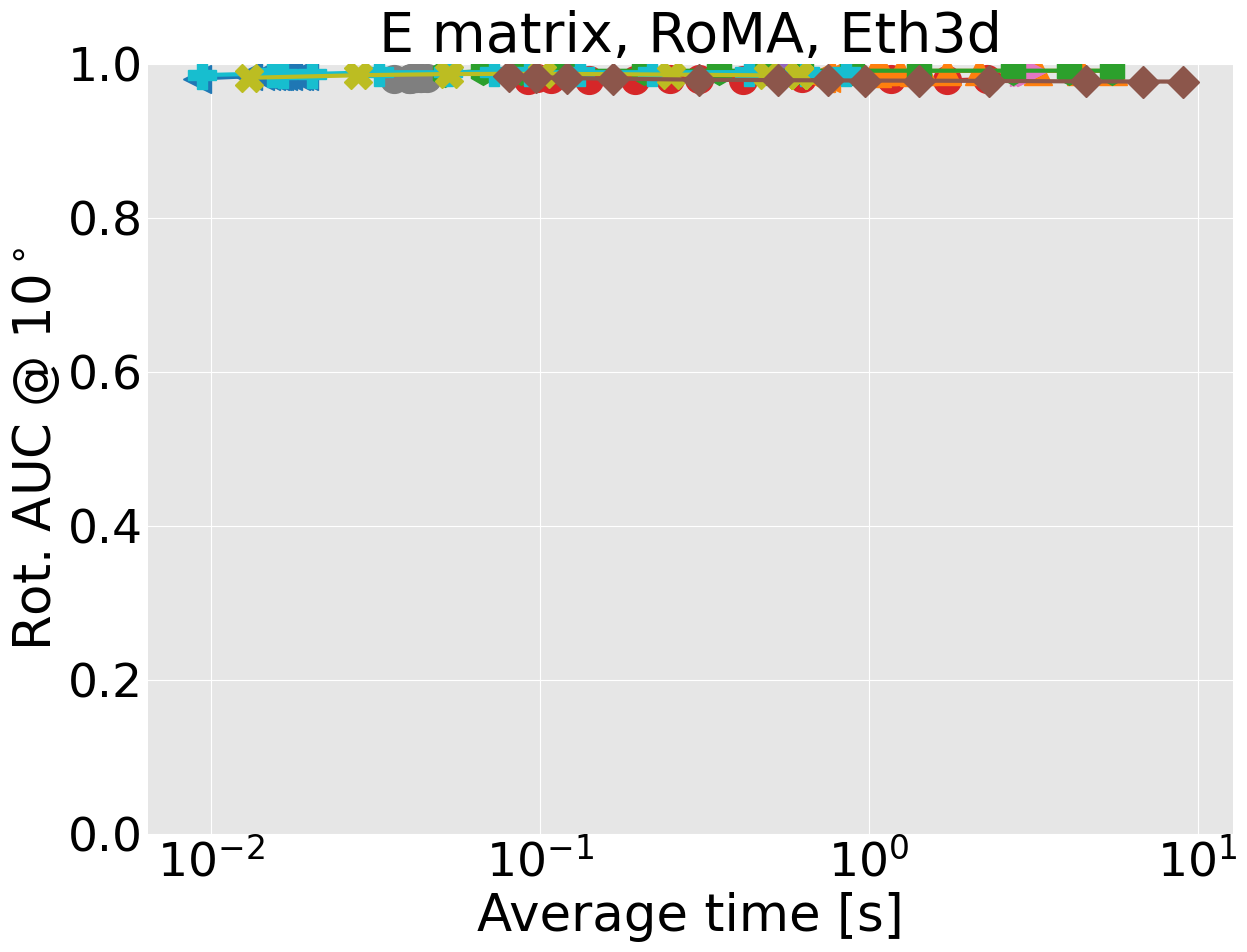

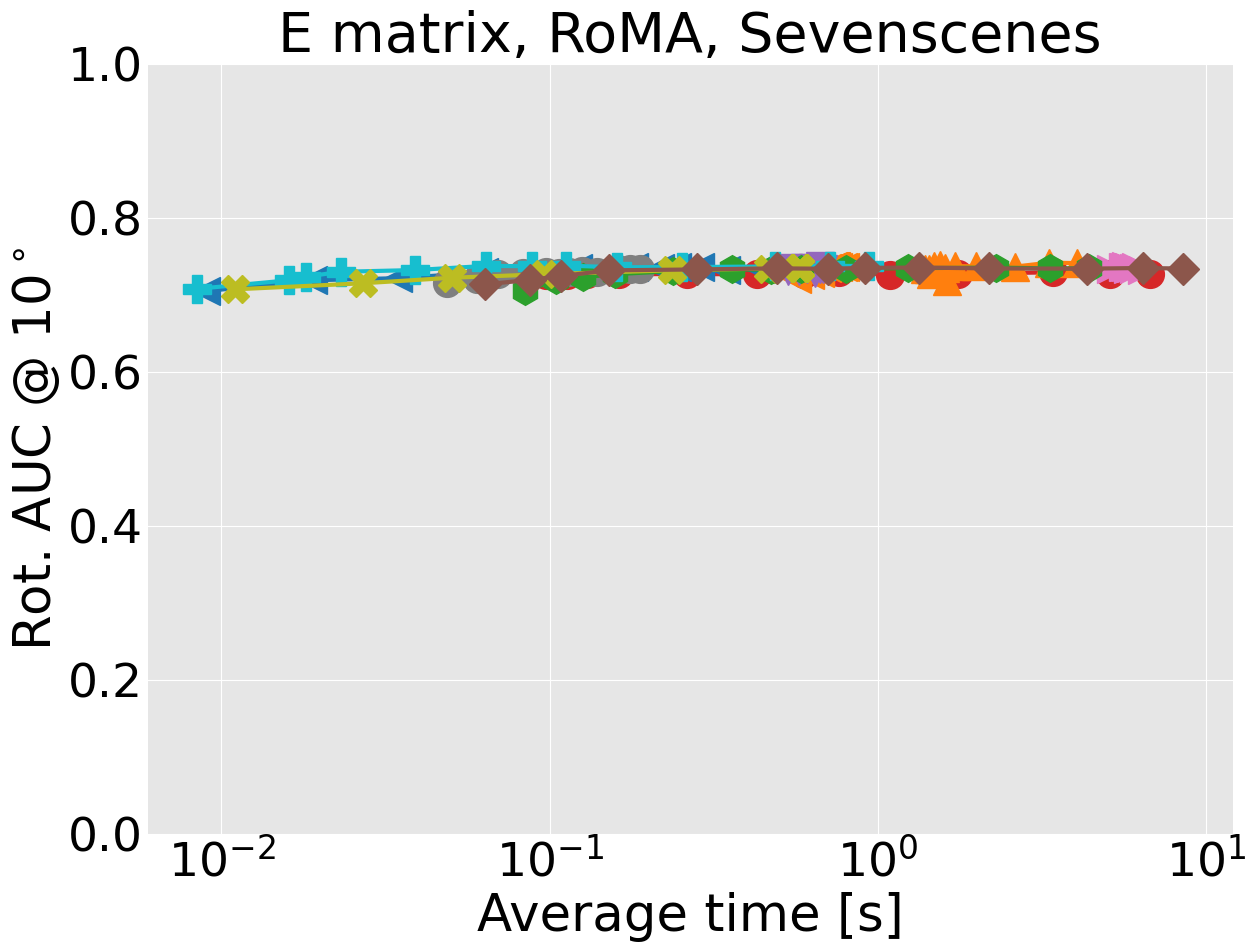

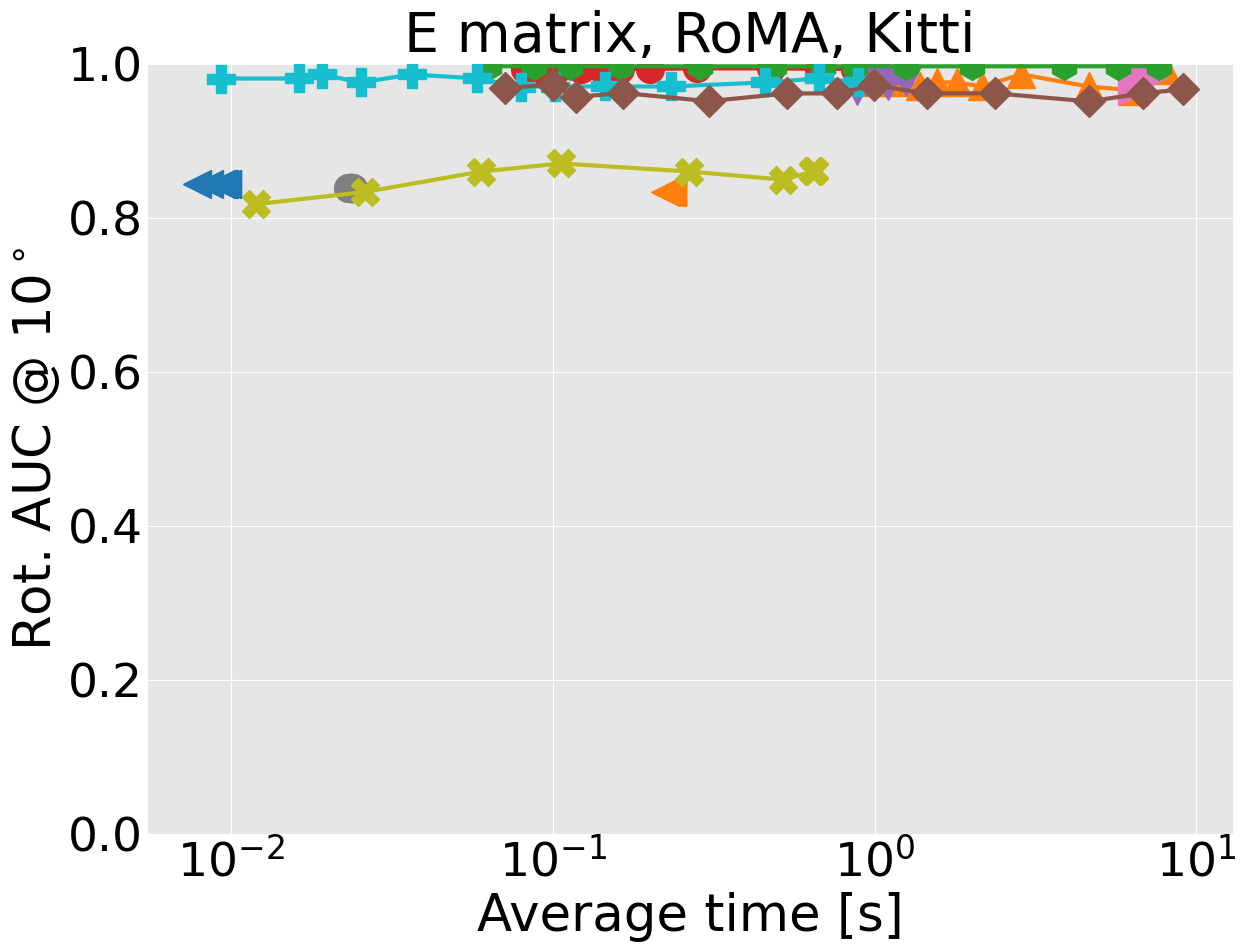

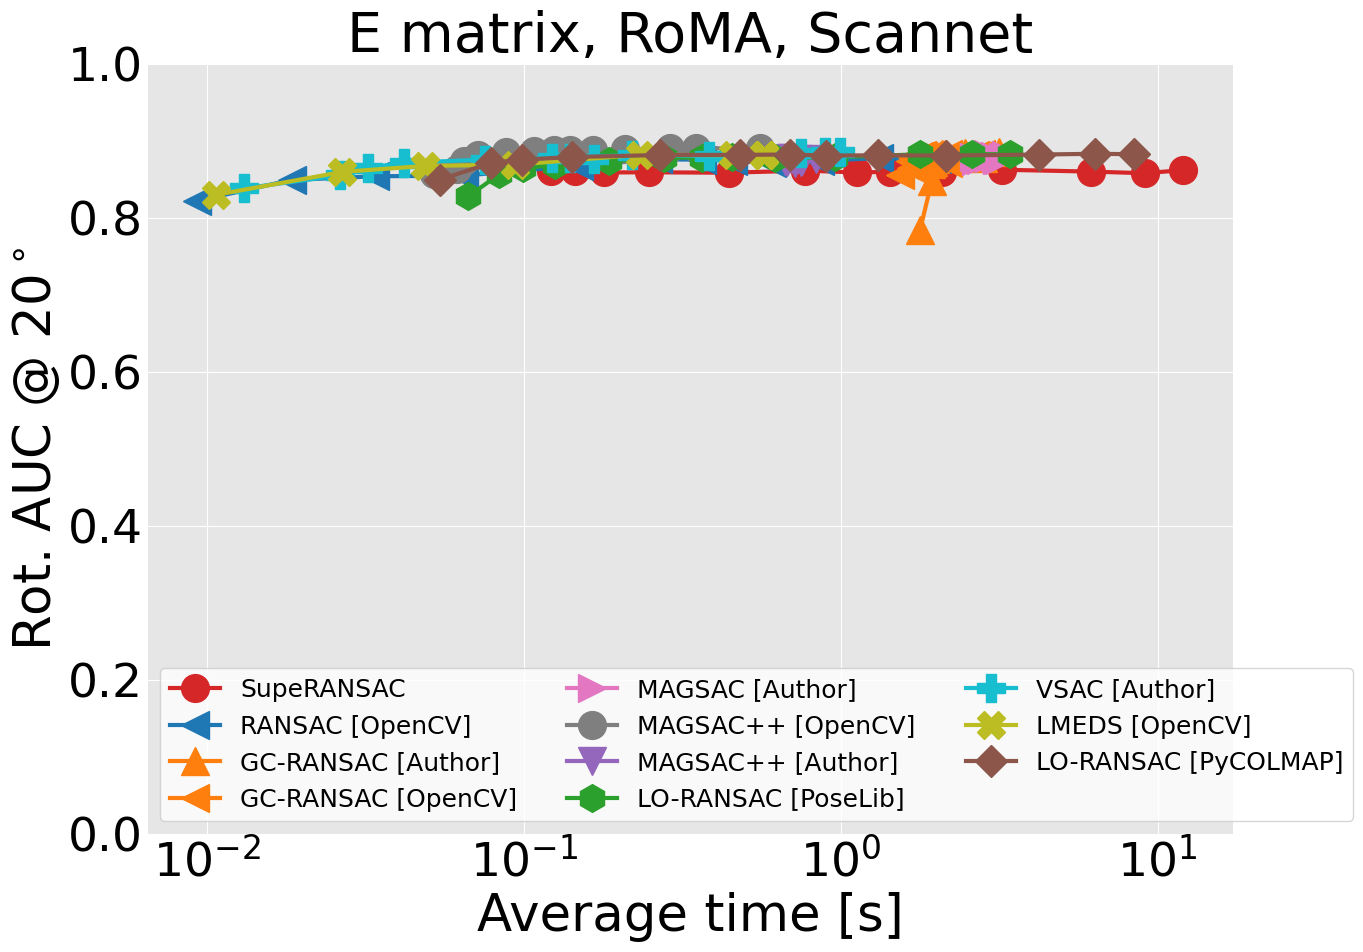

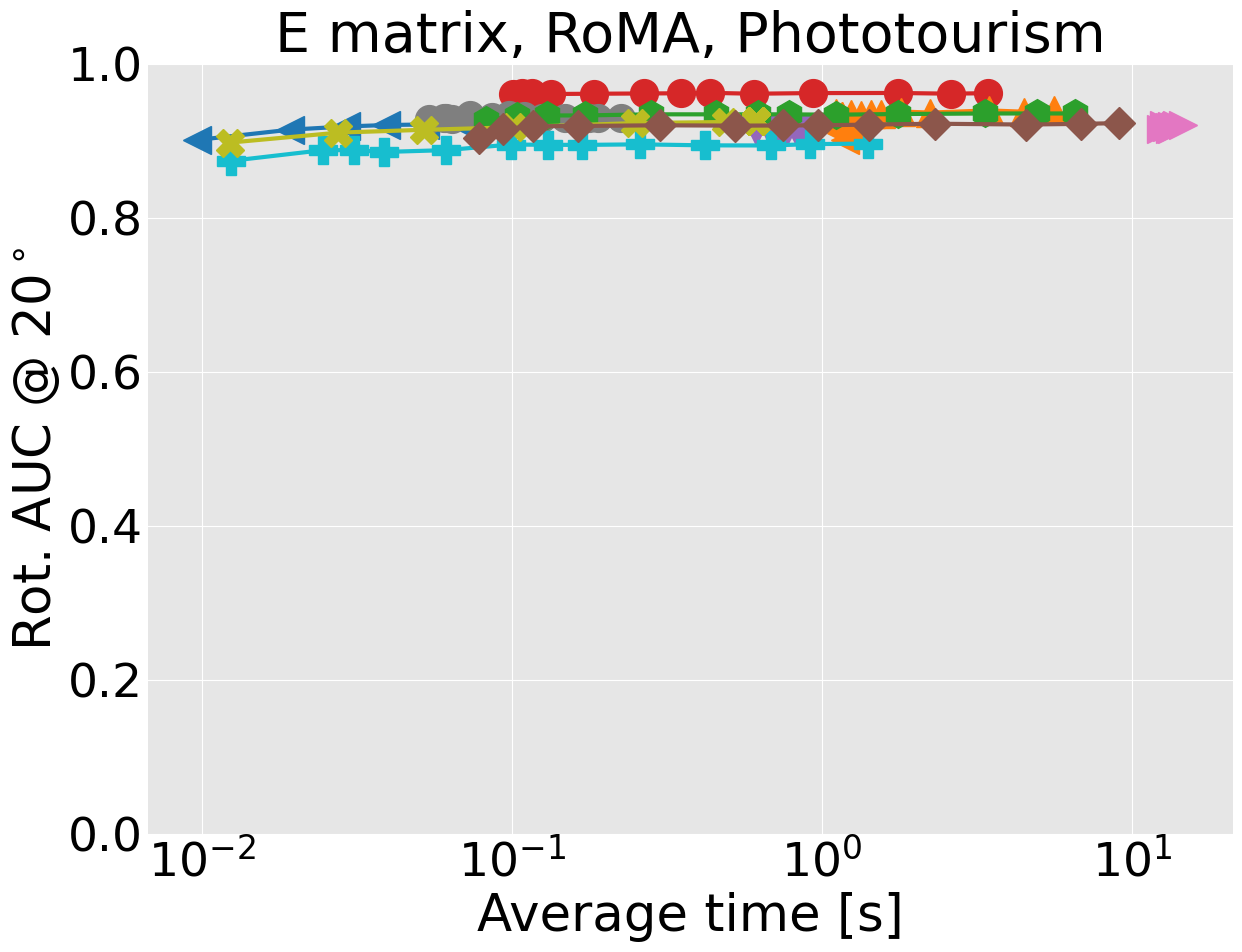

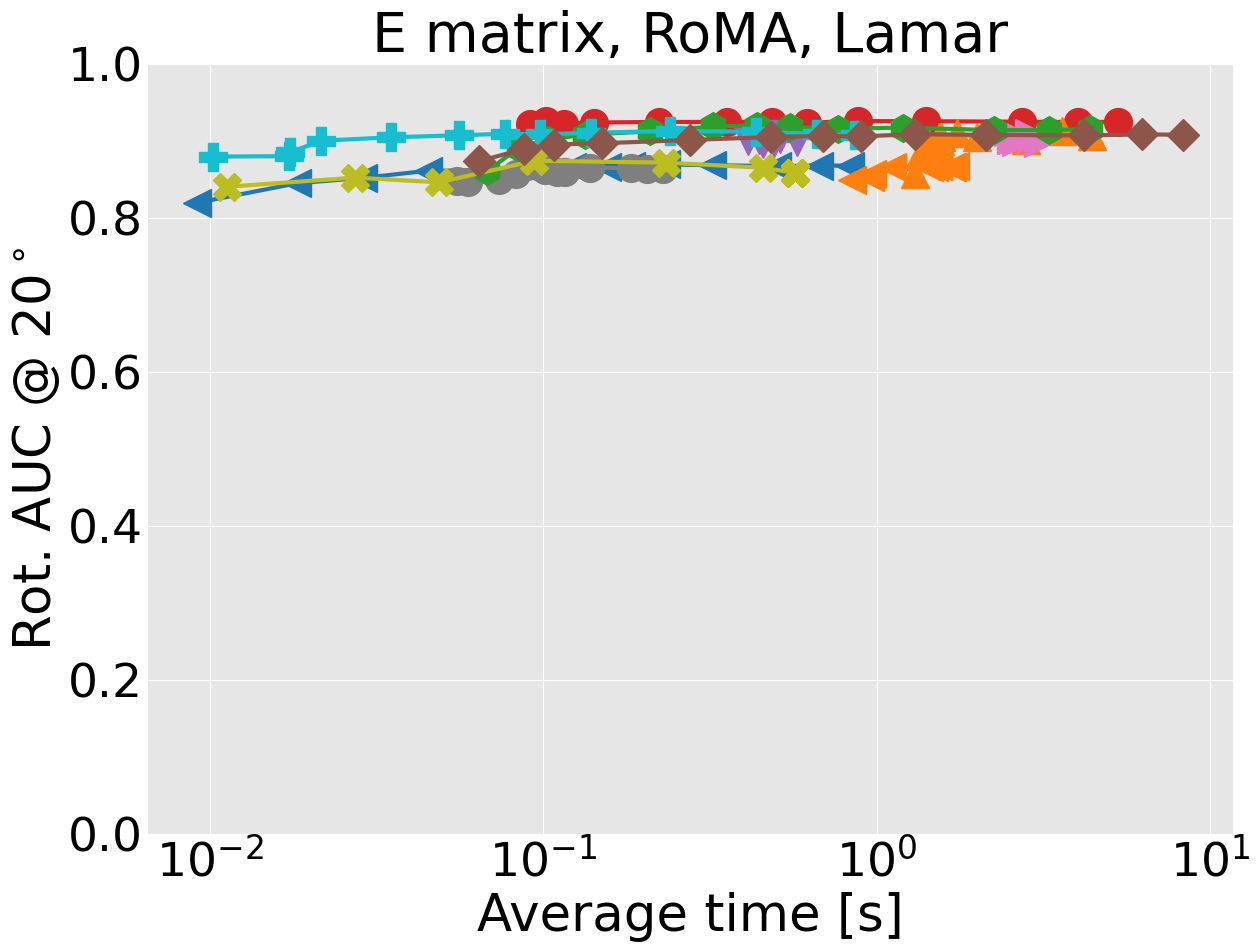

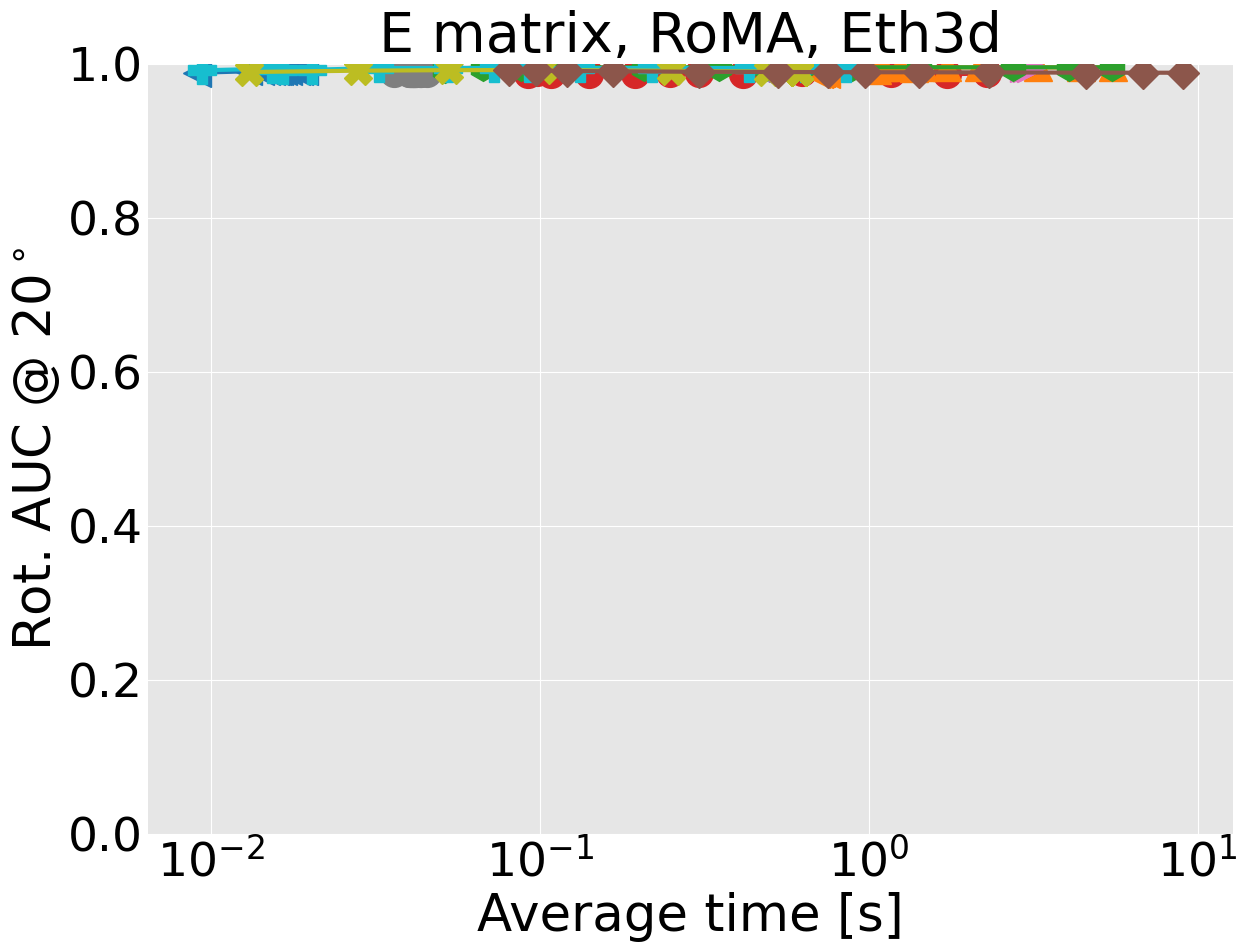

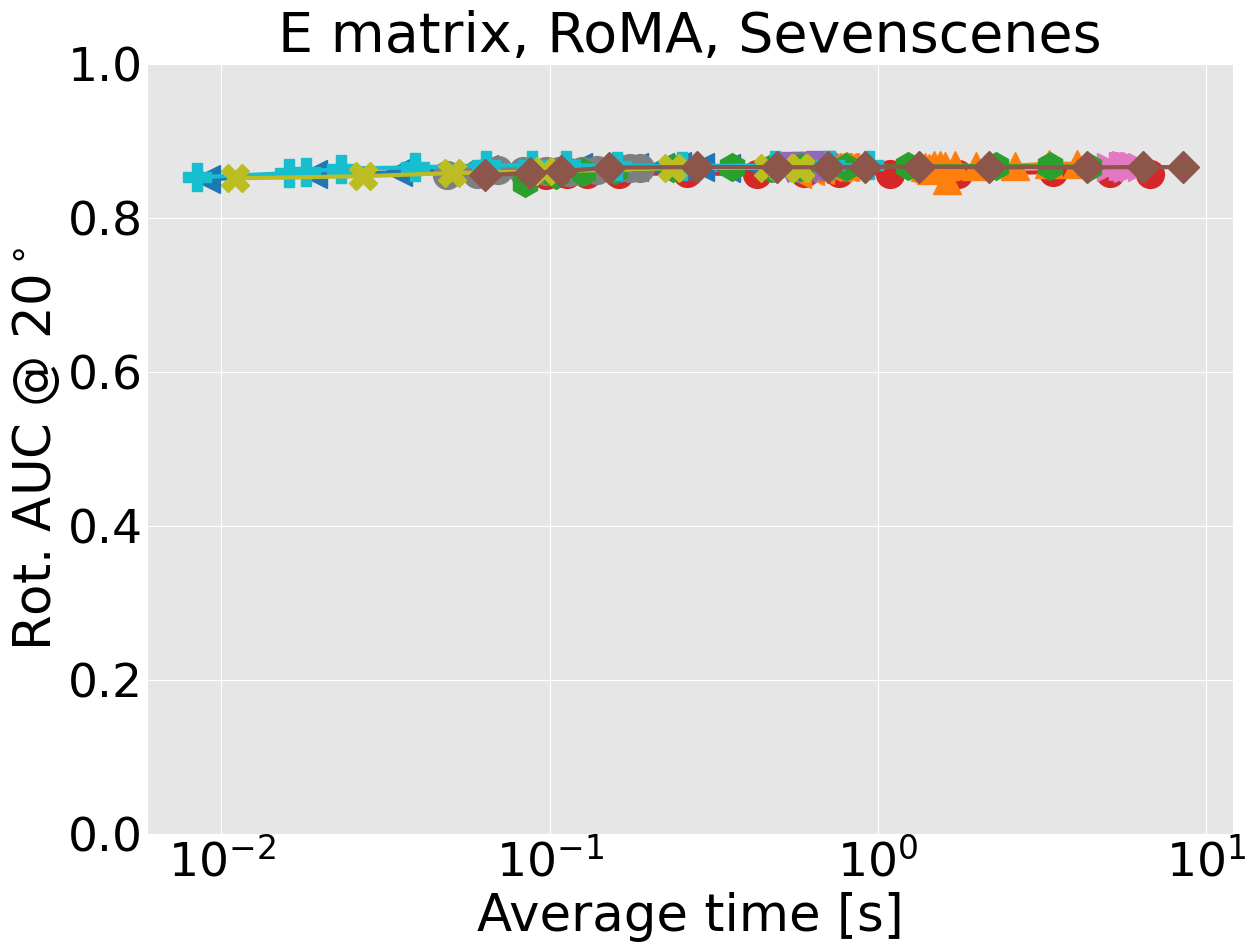

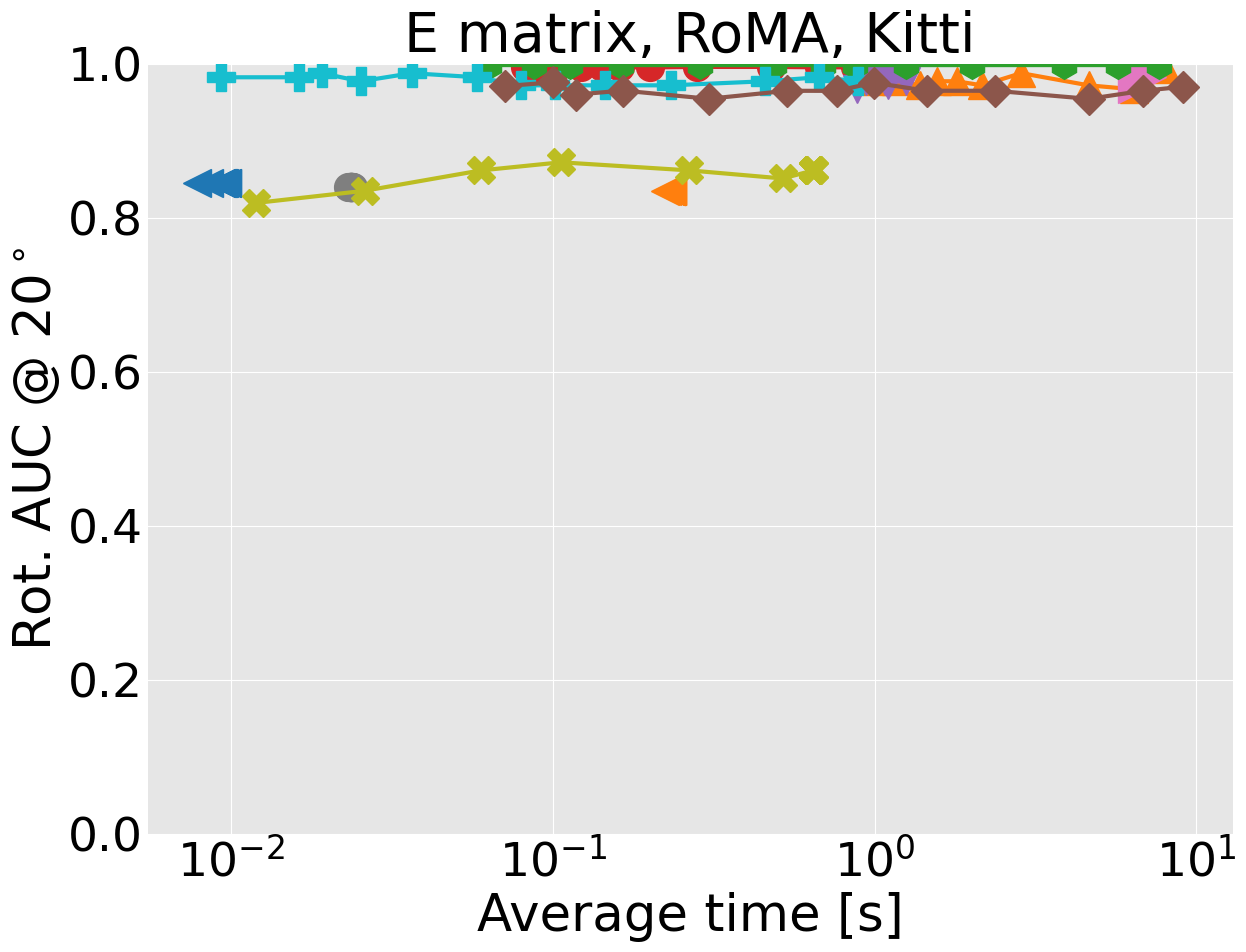

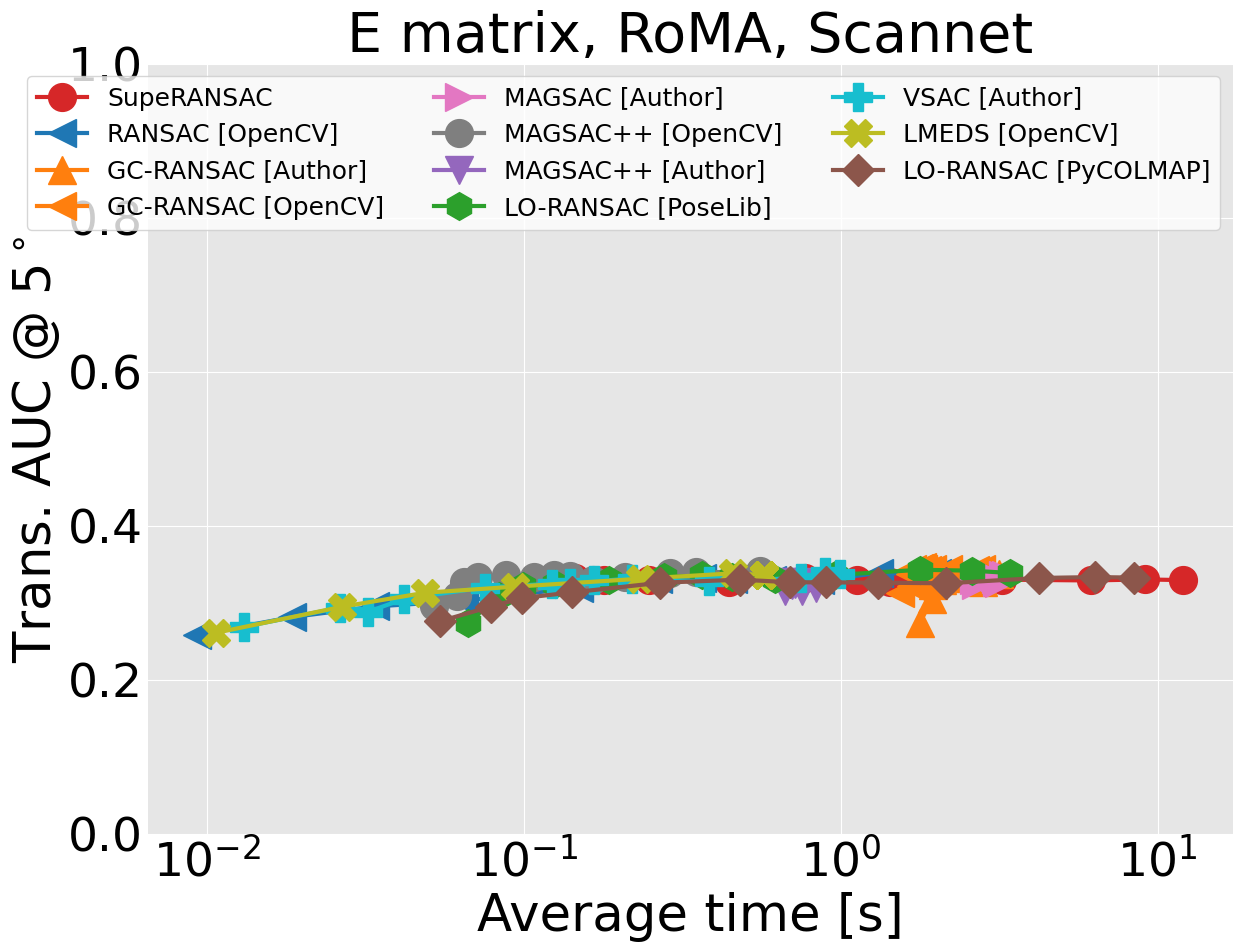

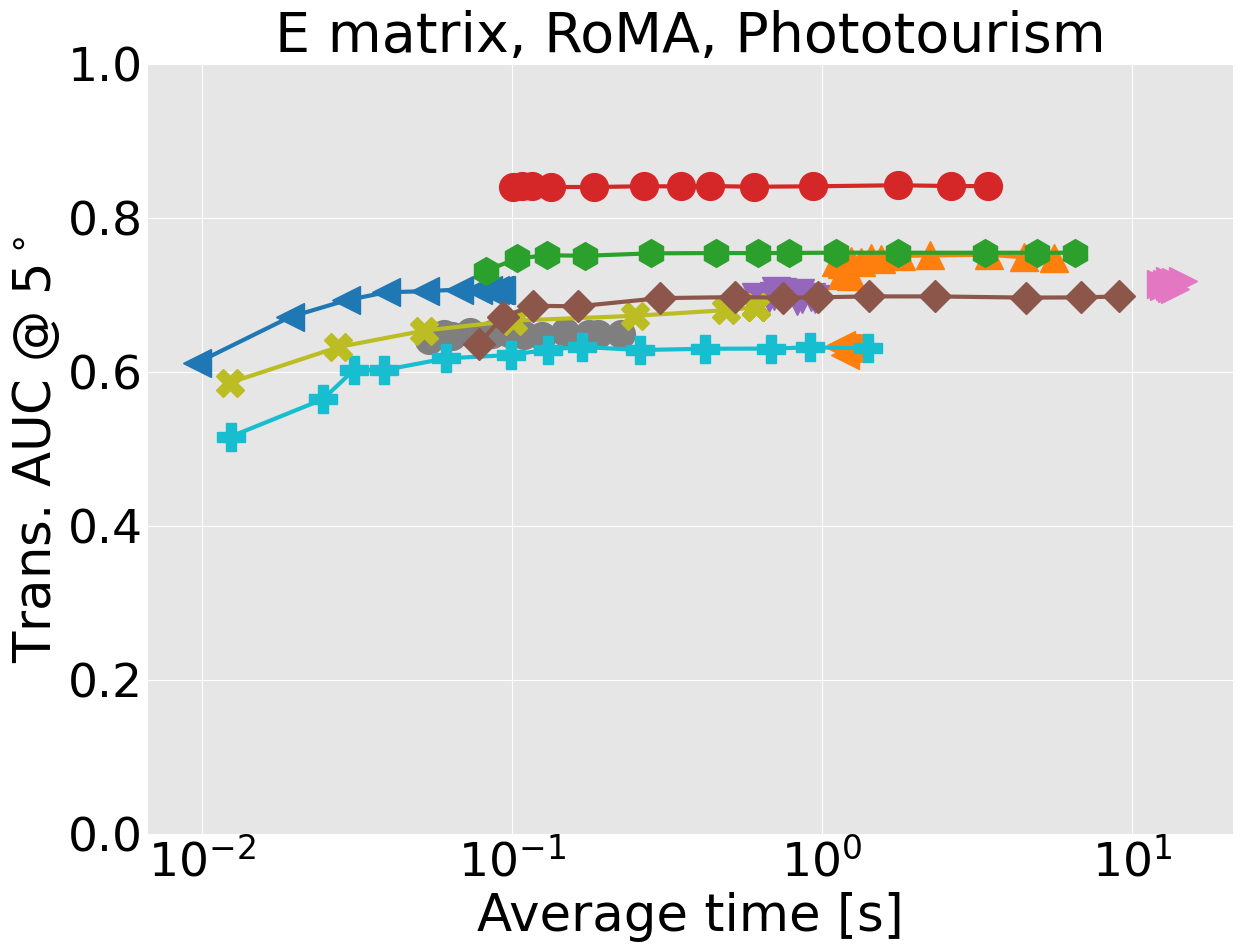

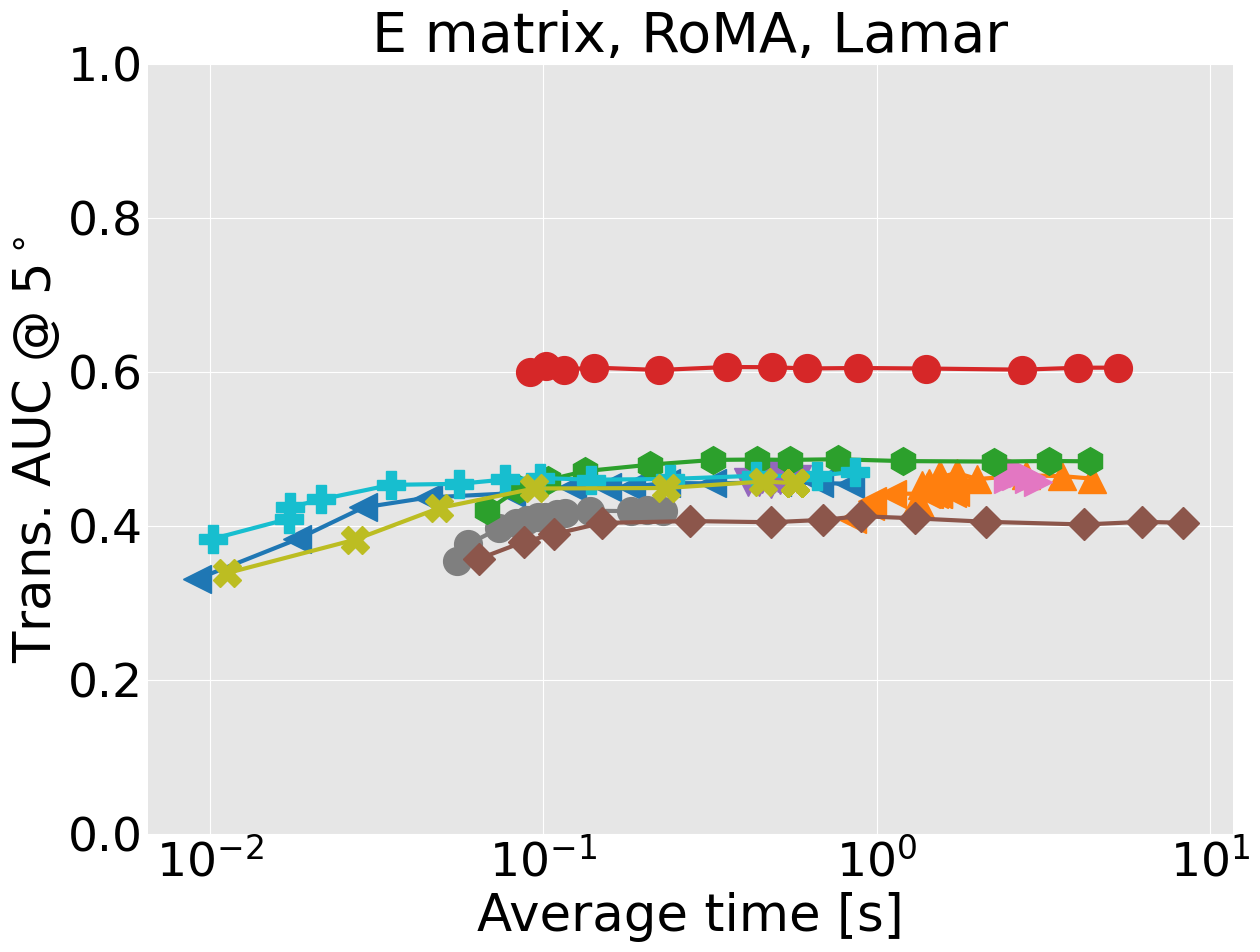

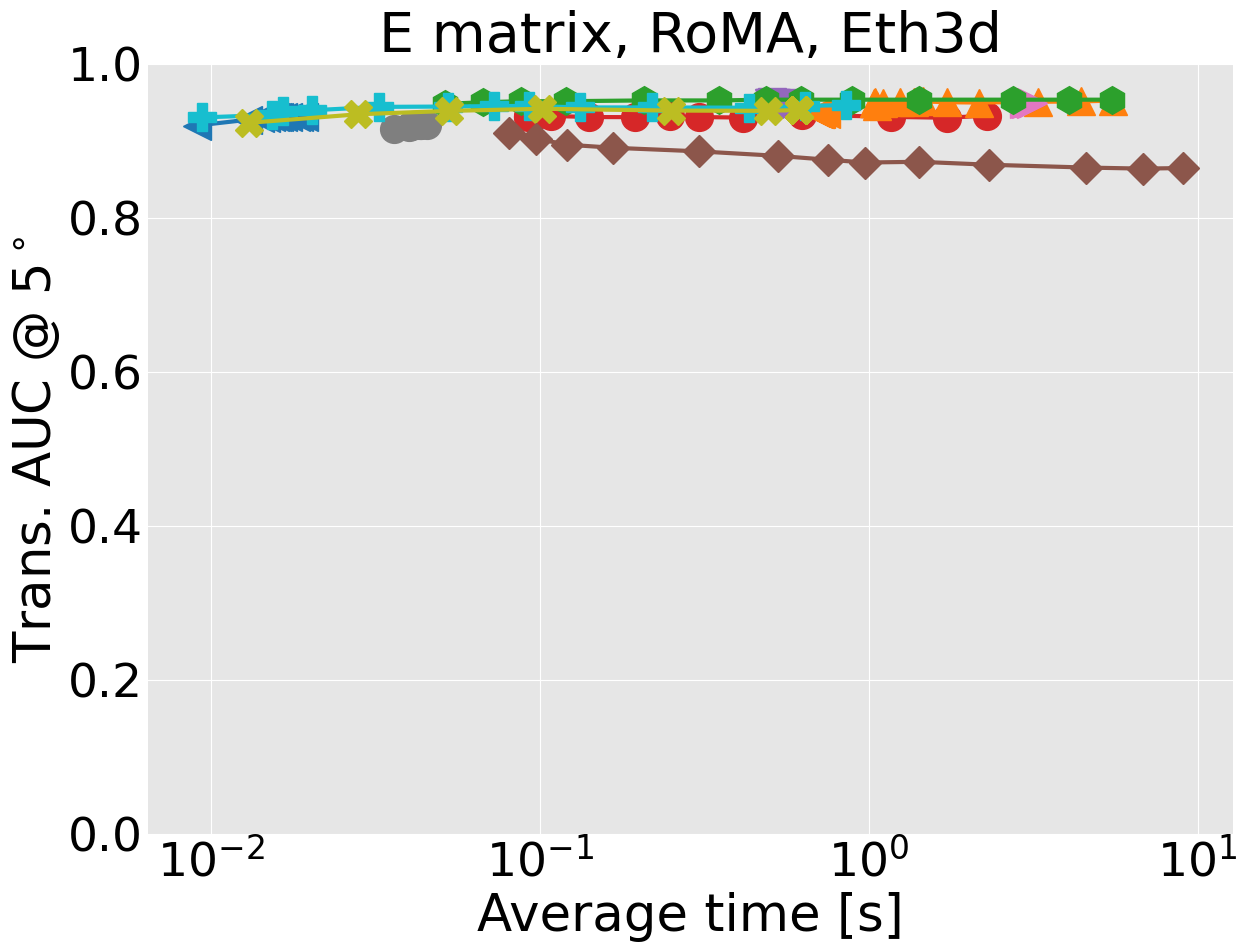

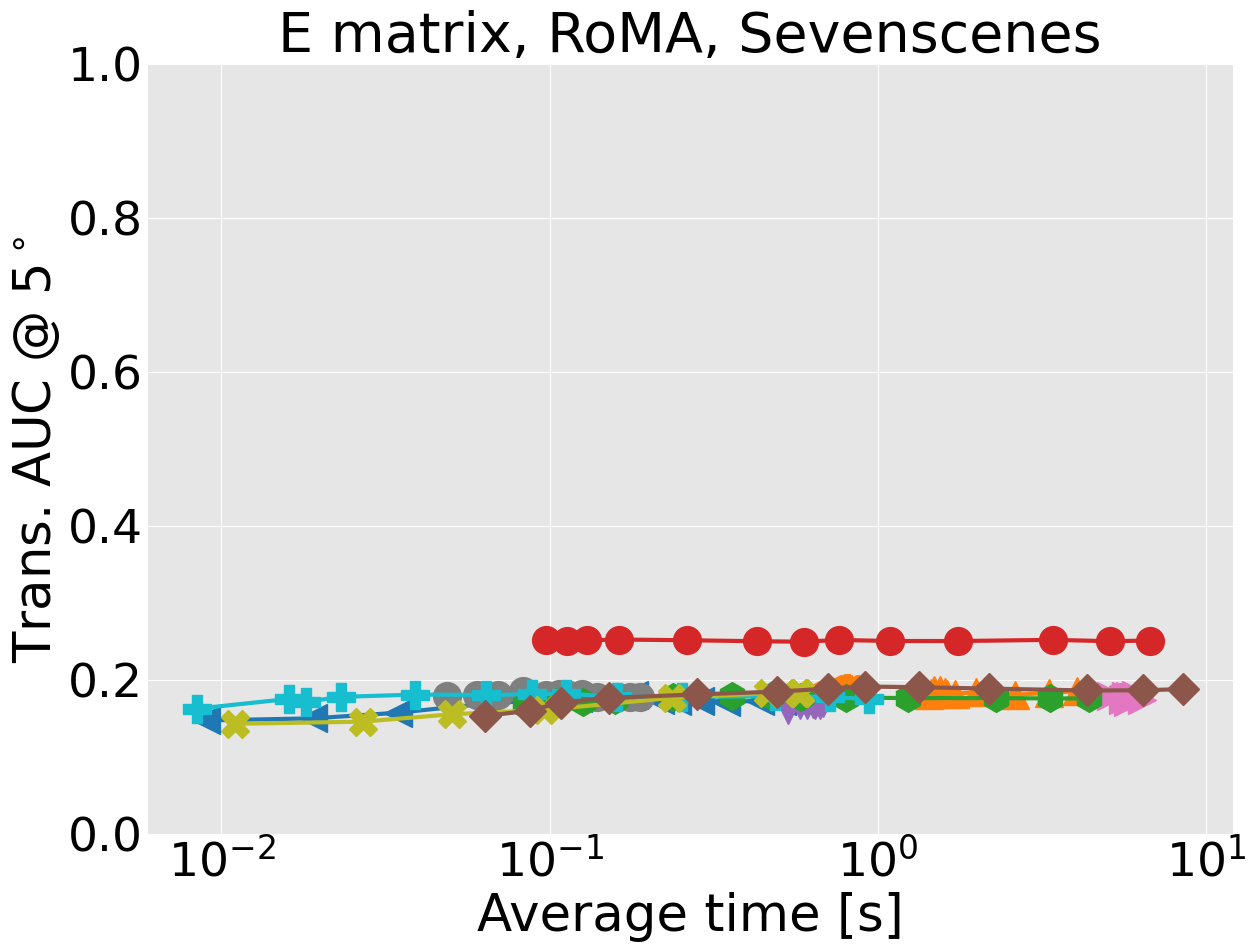

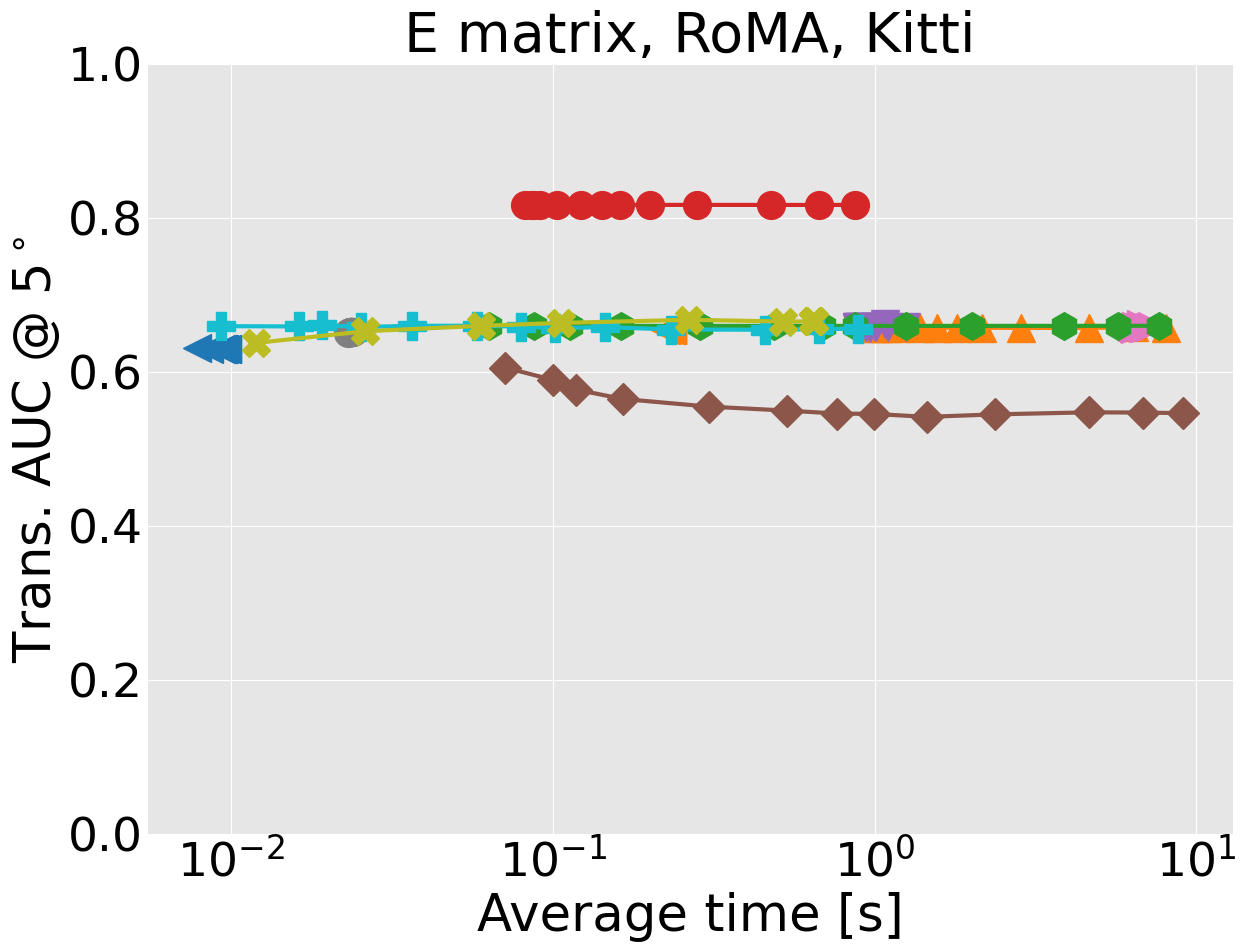

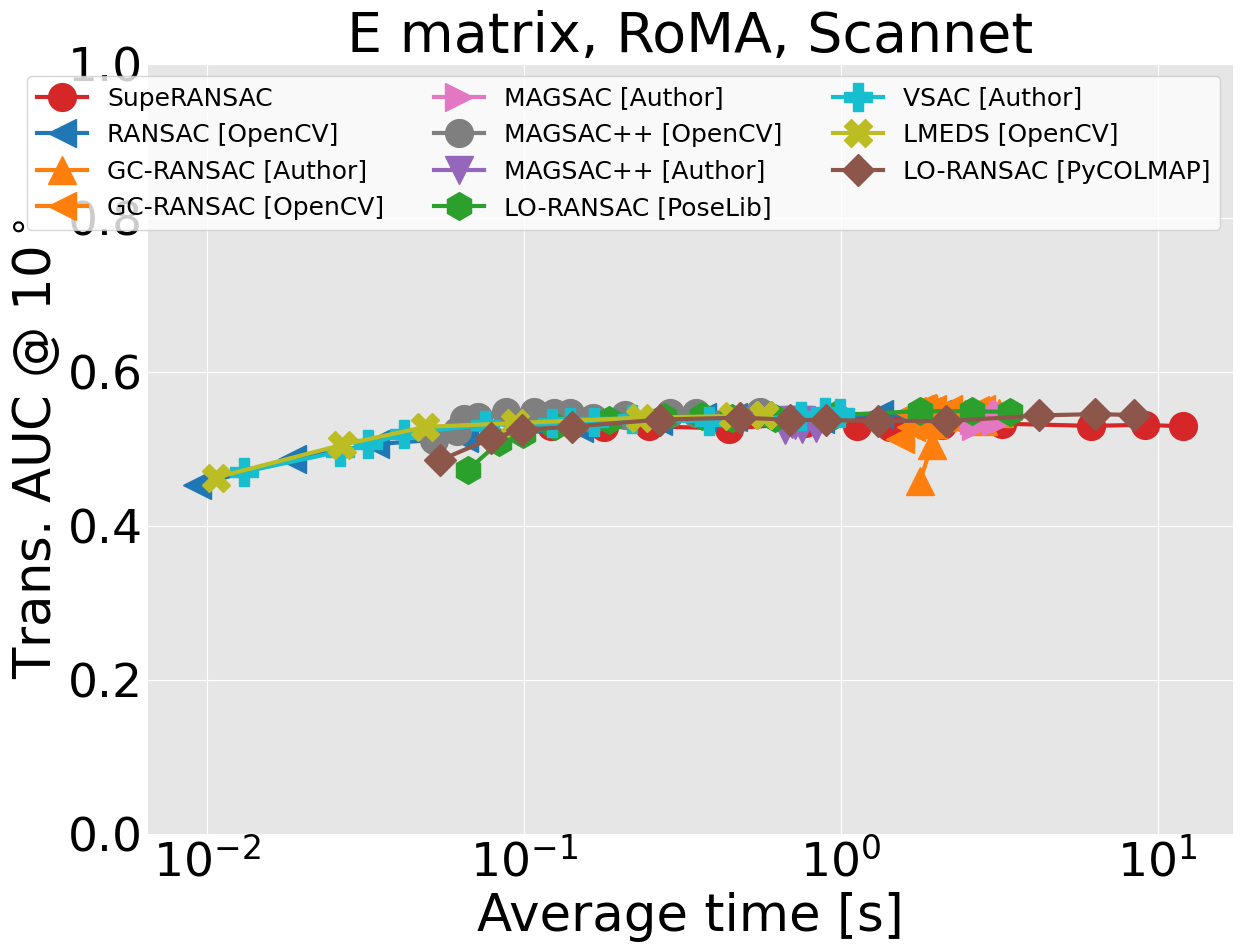

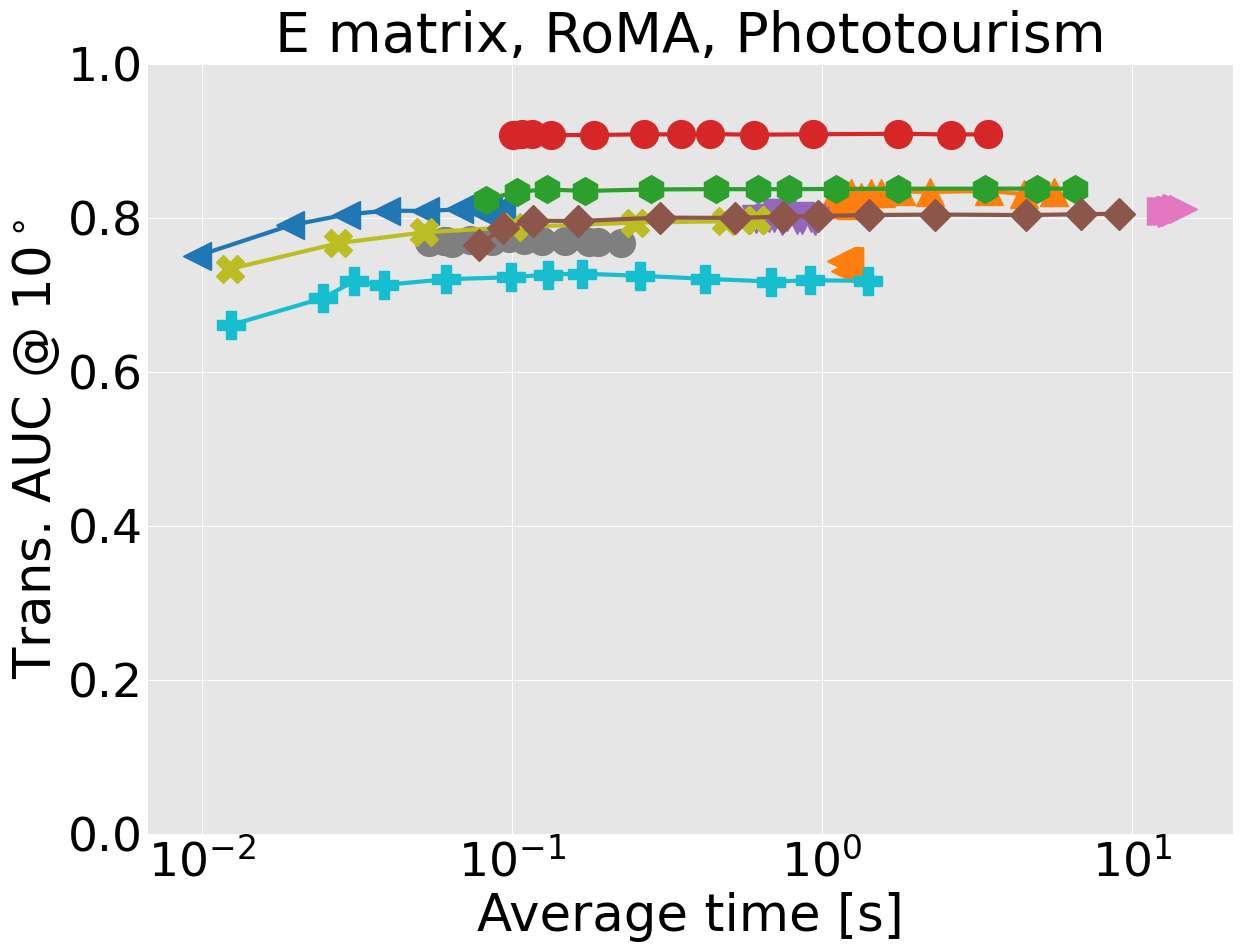

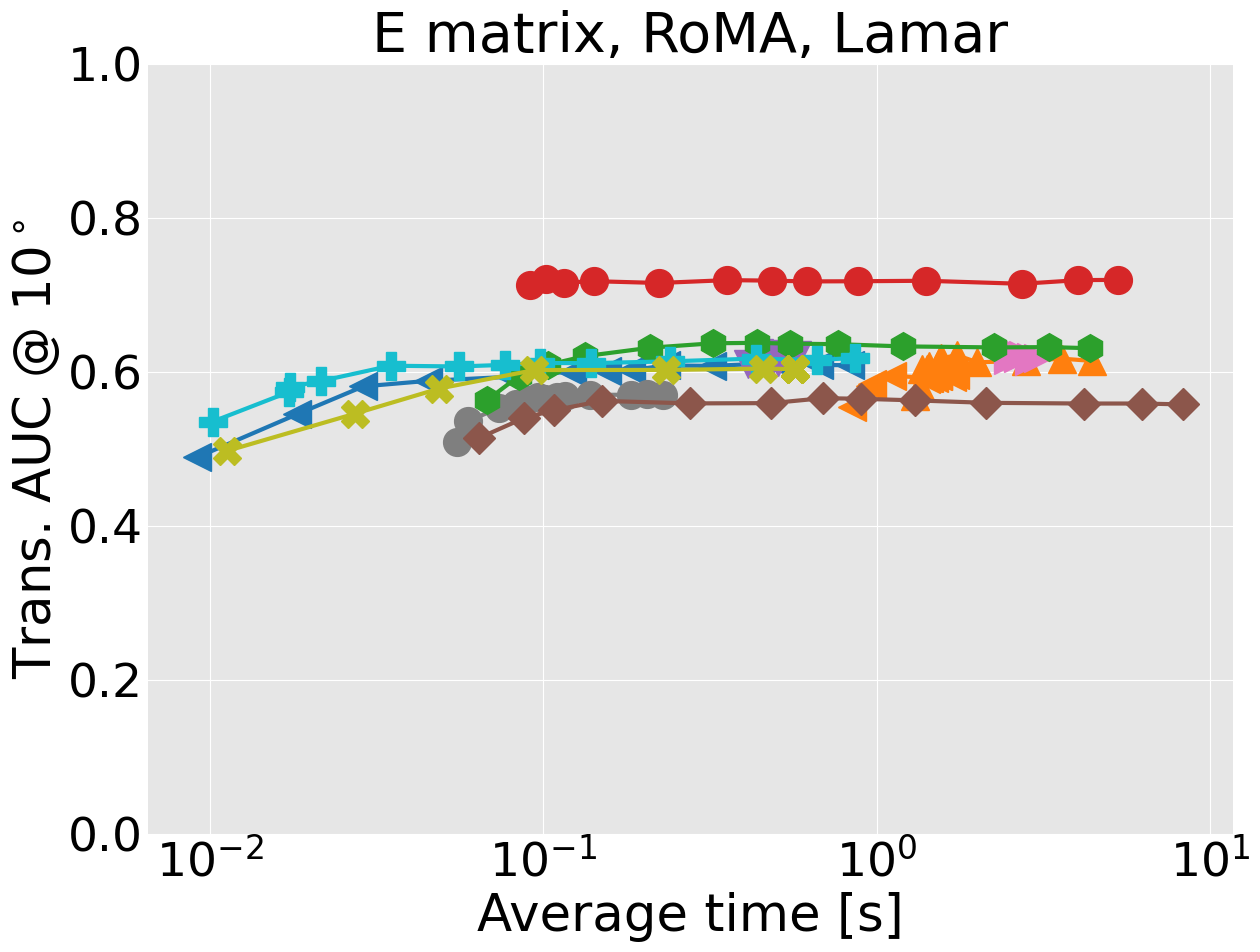

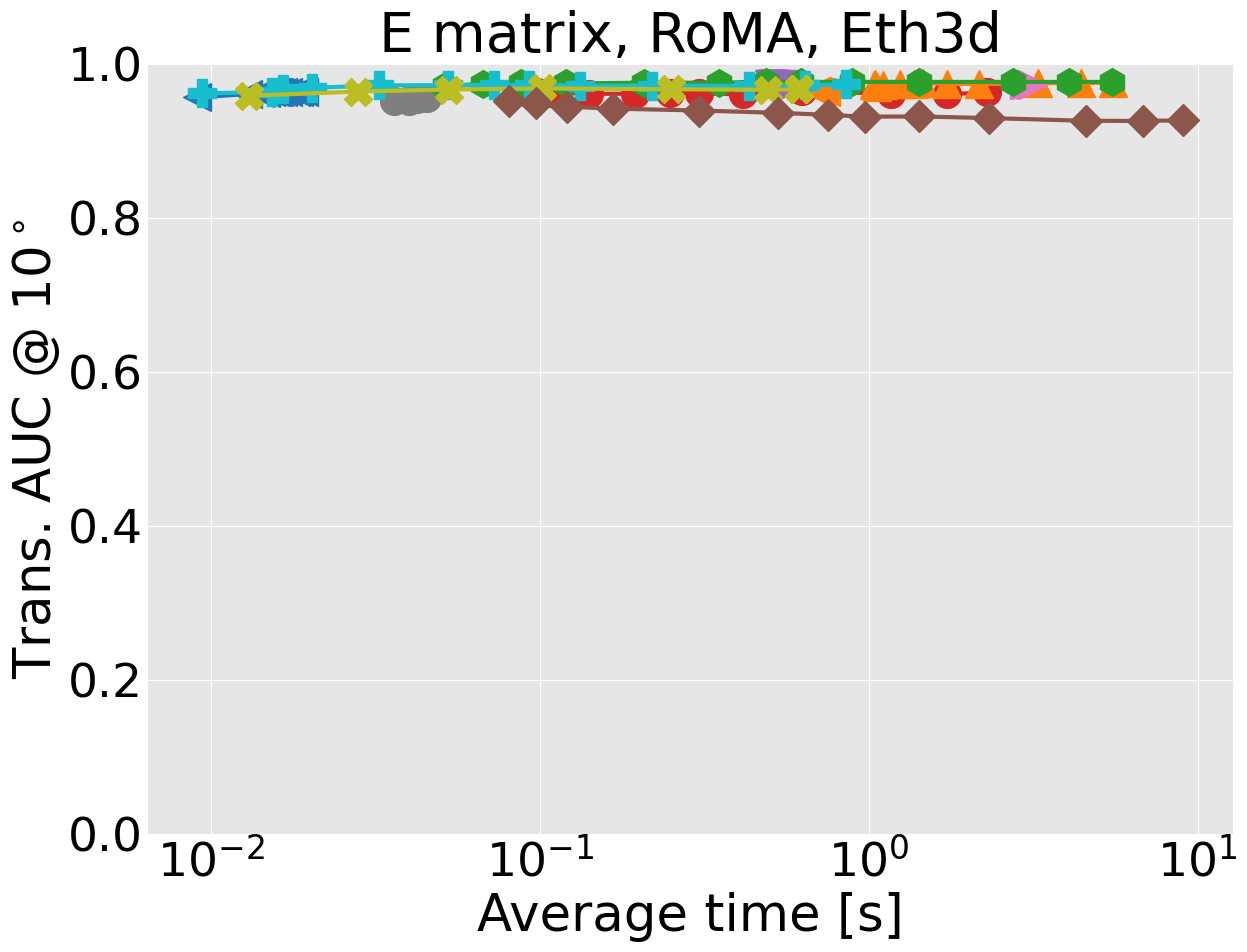

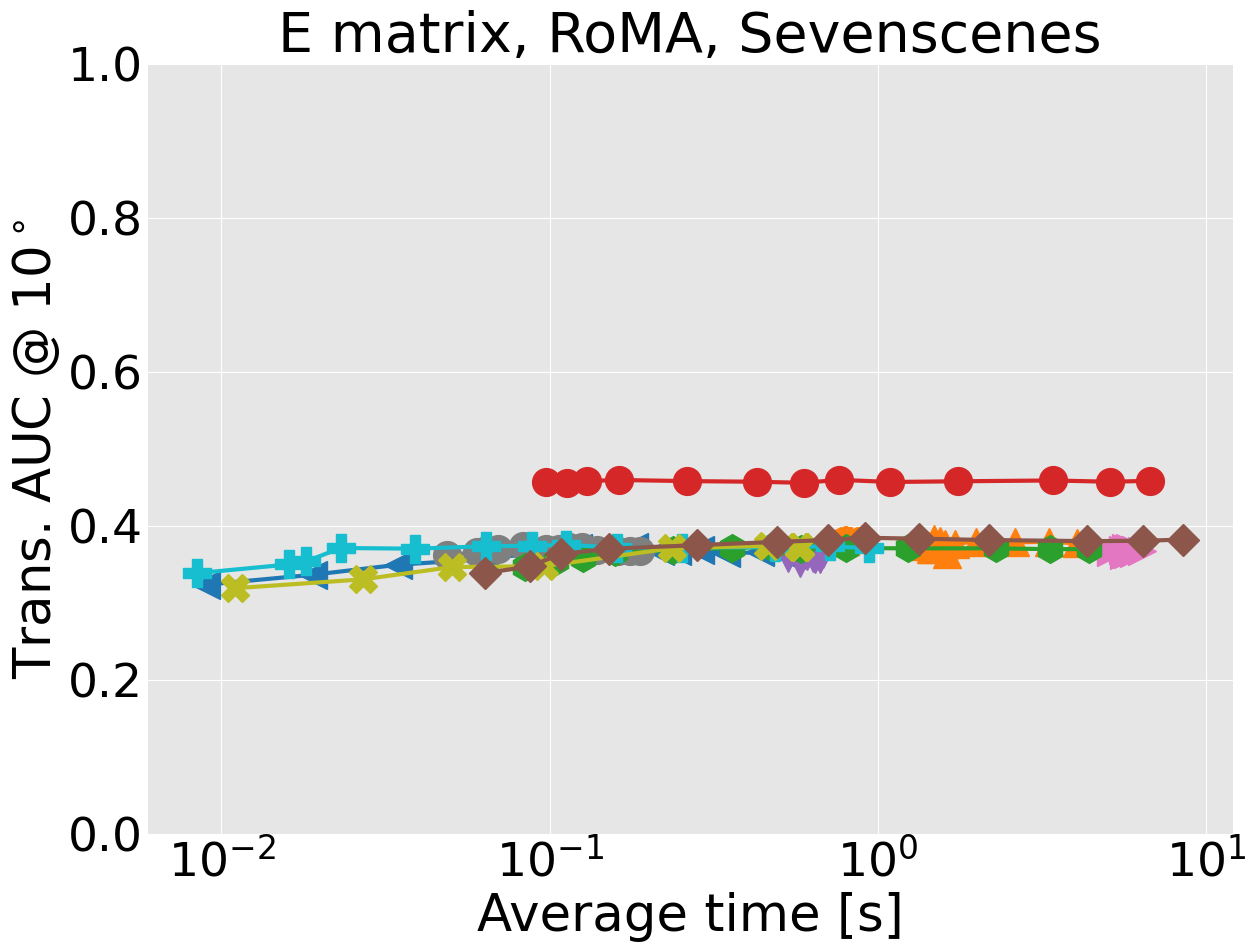

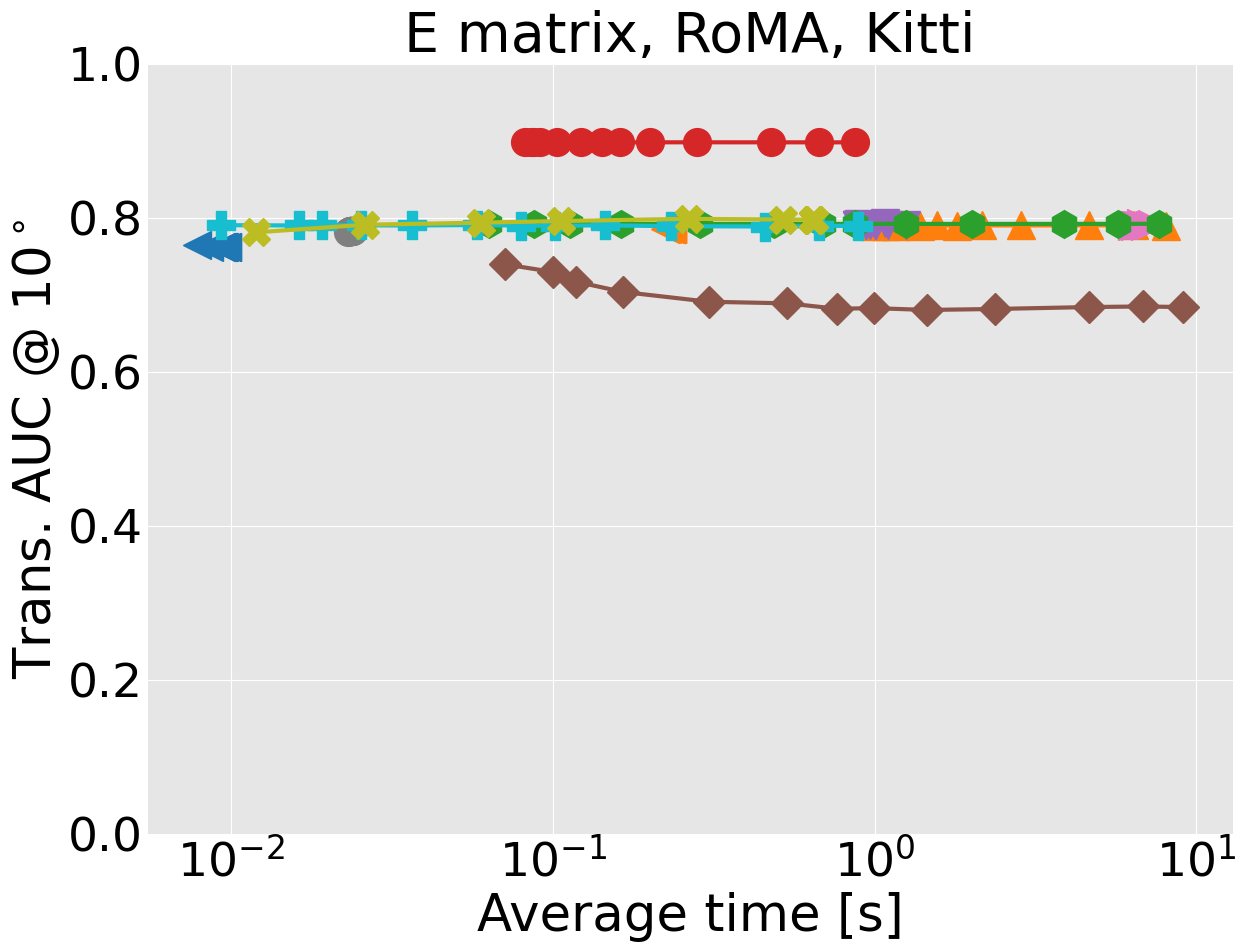

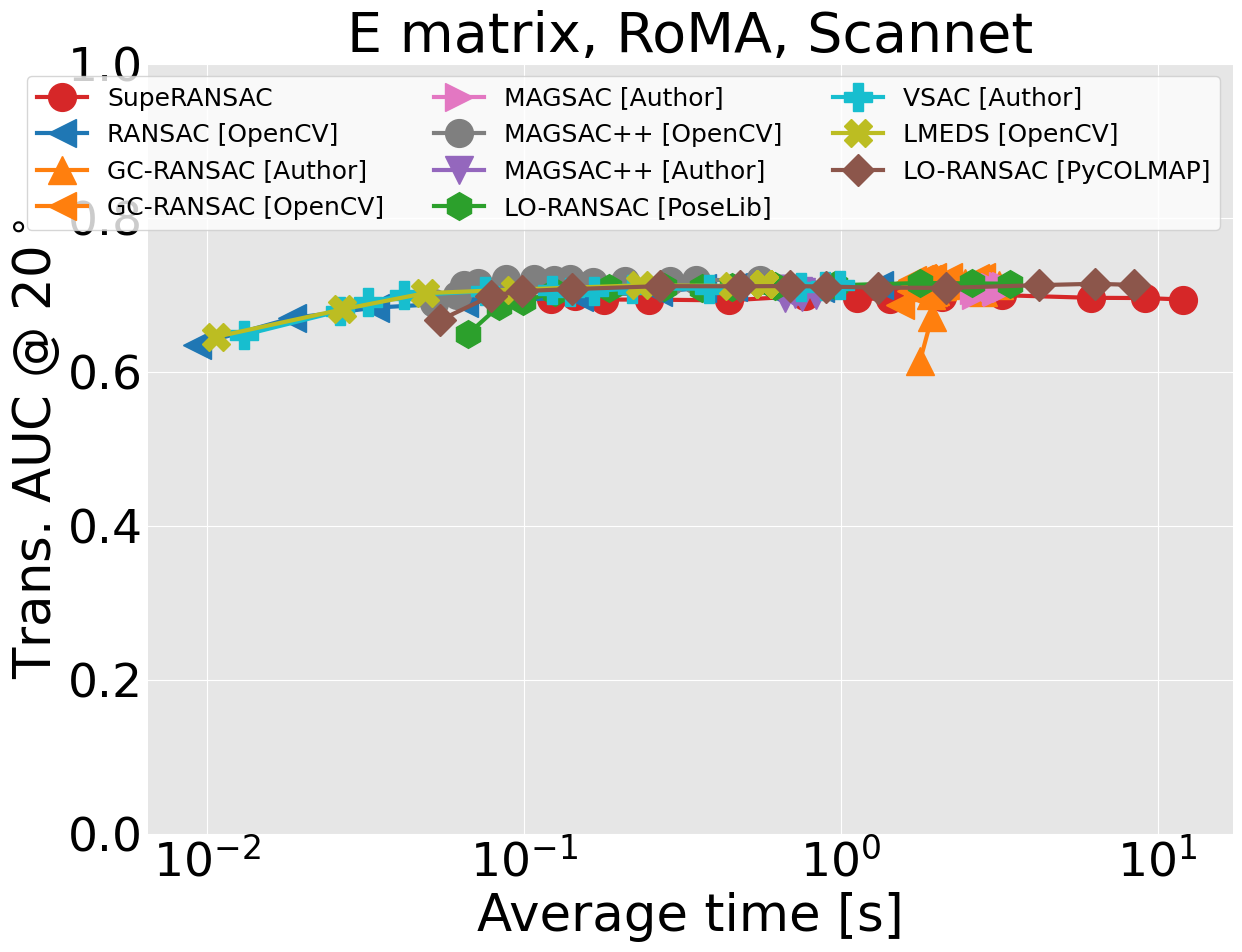

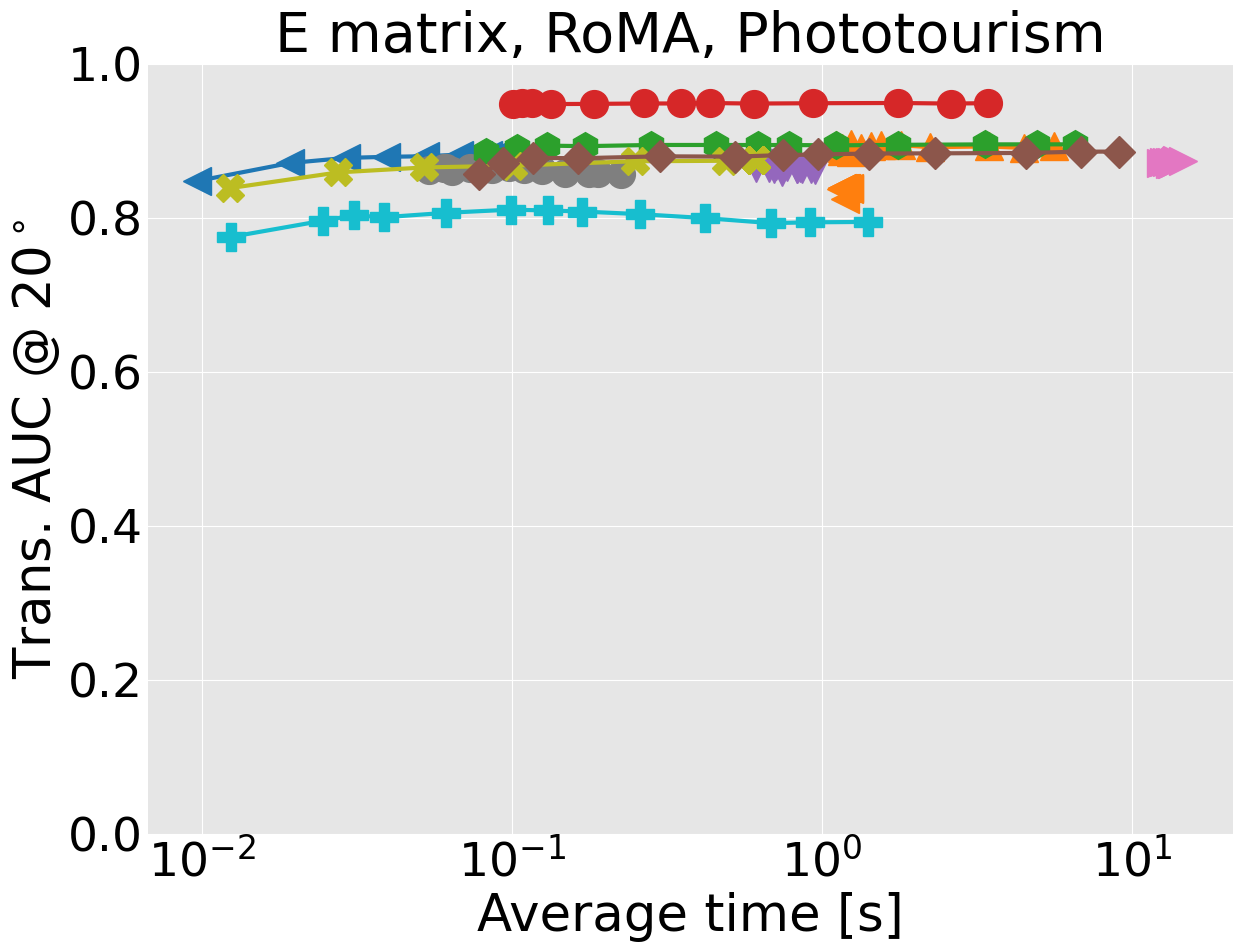

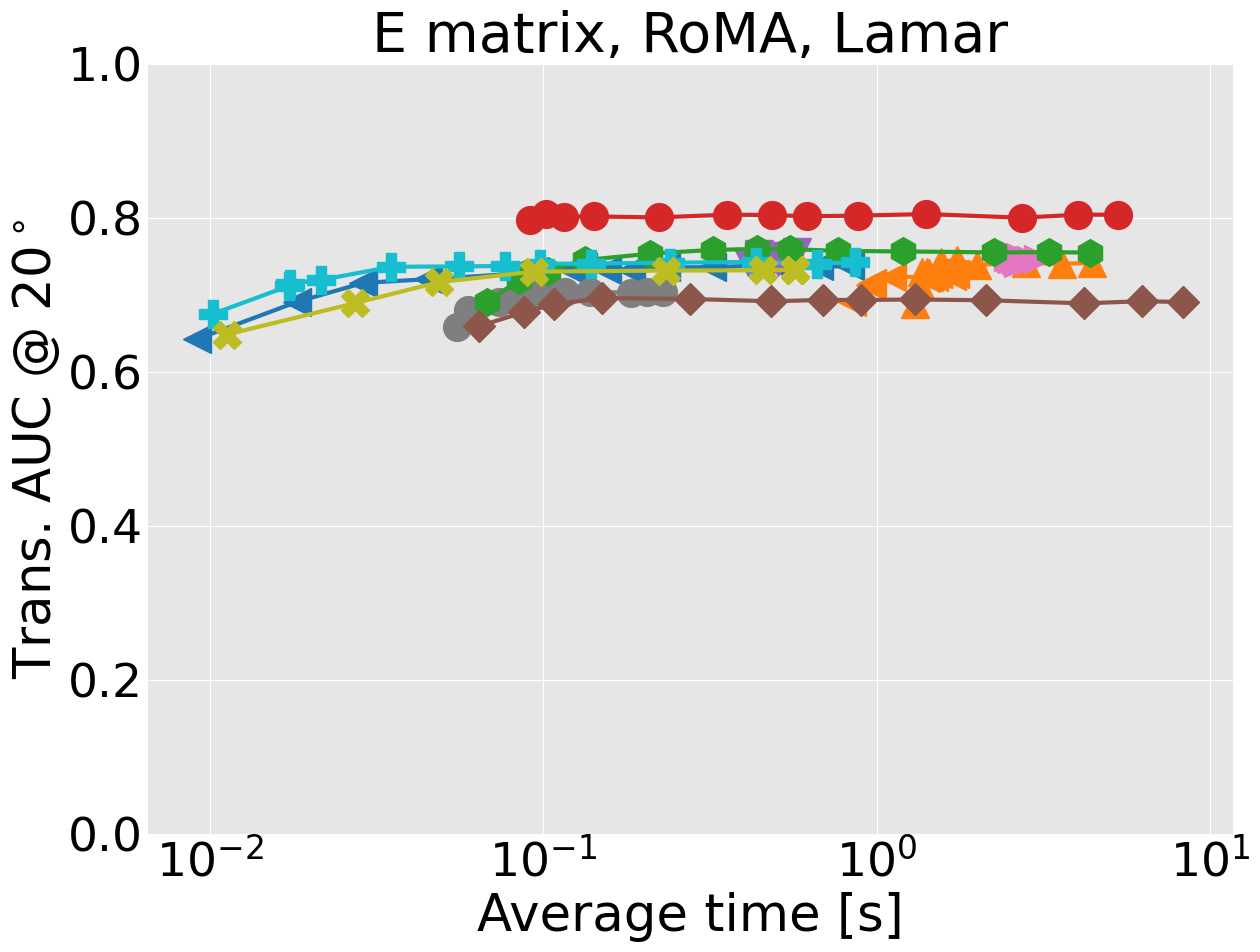

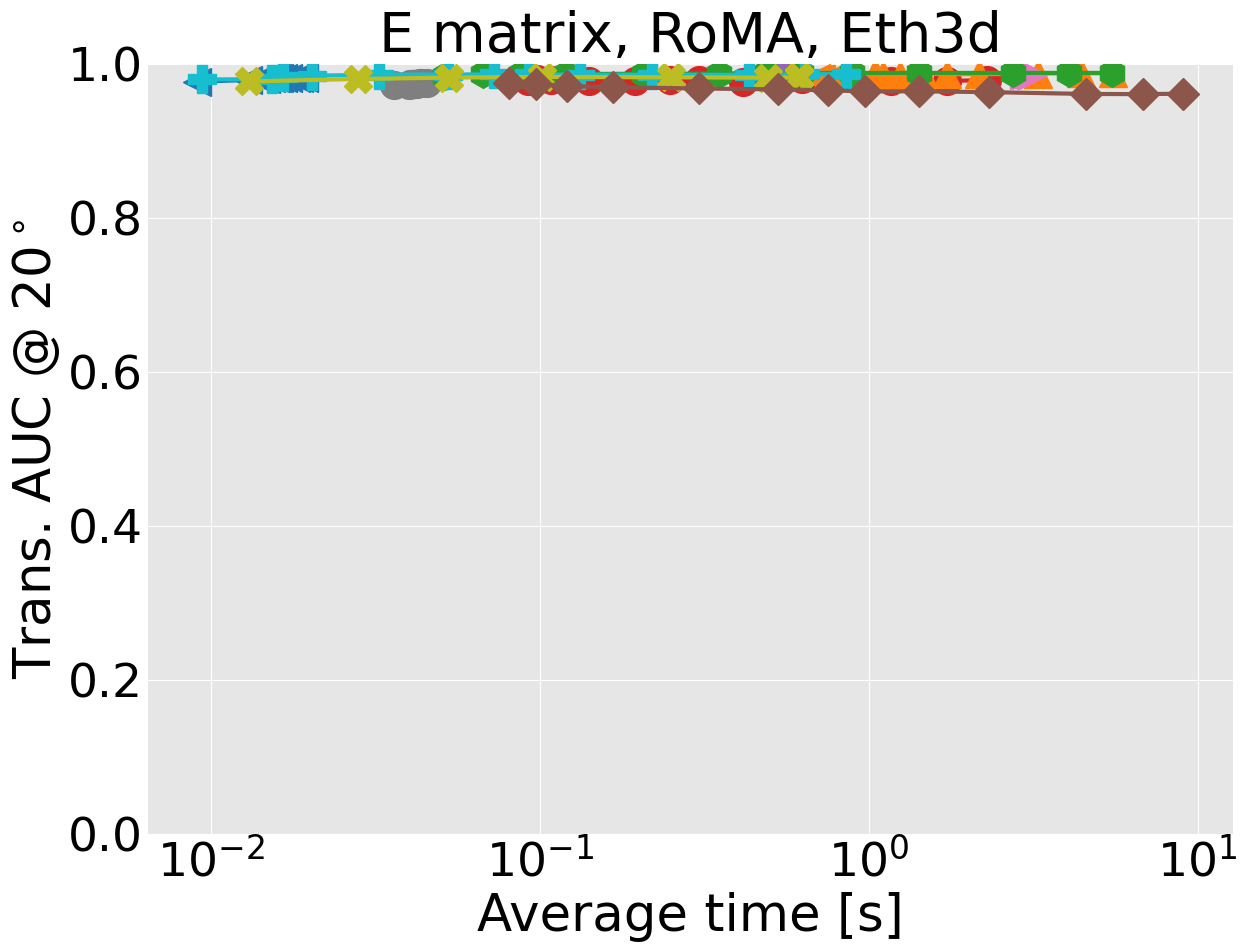

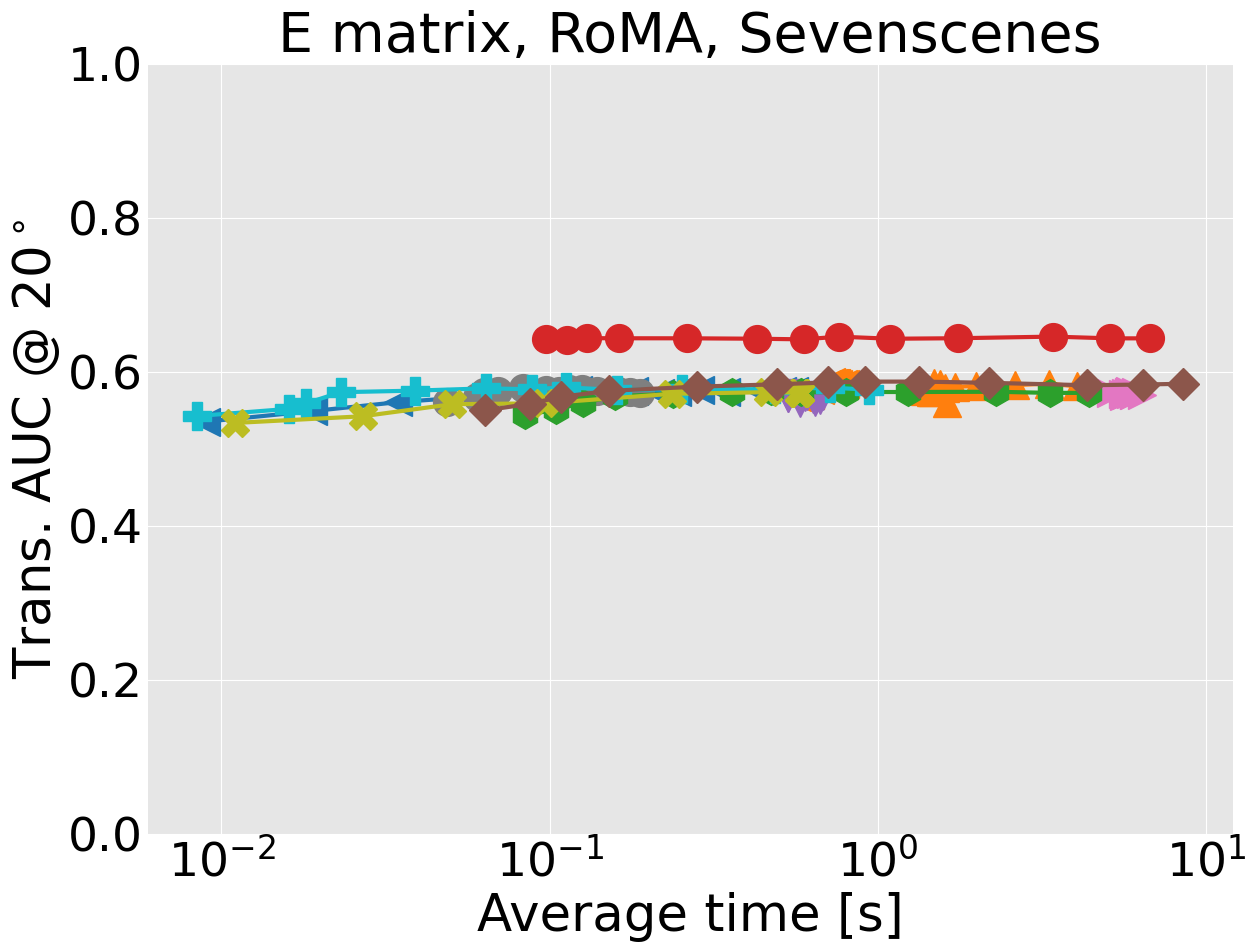

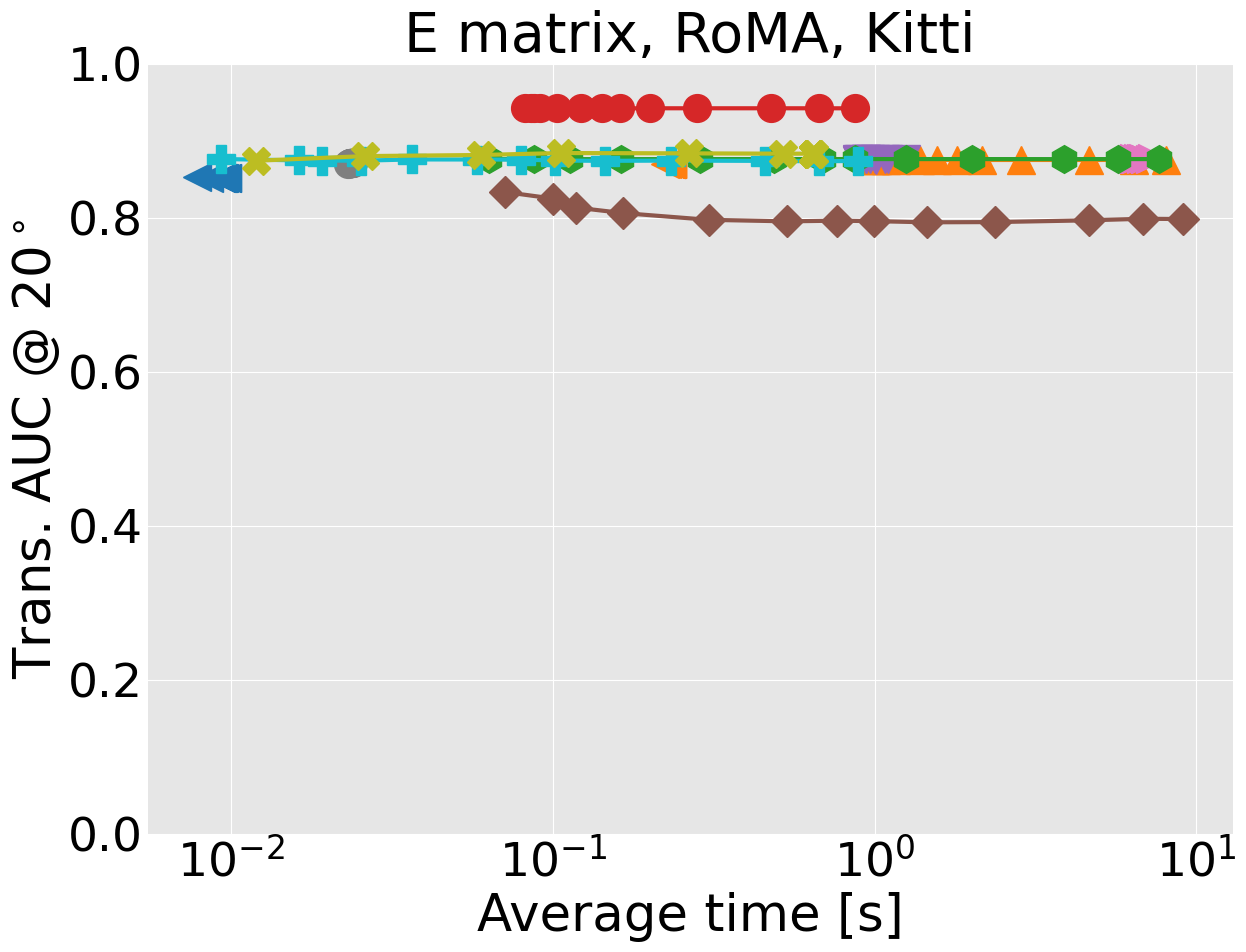

In [130]:
figsize = (14, 10)  # Define the fixed plot size once
method_names = sorted(list(res['method'].unique()))
df = res
max_iters_list = sorted(list(df['maximum_iterations'].unique()))

metric_labels = {
    "auc_Rt5": "AUC @ $5^\circ$",
    "auc_Rt10": "AUC @ $10^\circ$",
    "auc_Rt20": "AUC @ $20^\circ$",
    "auc_R5": "Rot. AUC @ $5^\circ$",
    "auc_R10": "Rot. AUC @ $10^\circ$",
    "auc_R20": "Rot. AUC @ $20^\circ$",
    "auc_t5": "Trans. AUC @ $5^\circ$",
    "auc_t10": "Trans. AUC @ $10^\circ$",
    "auc_t20": "Trans. AUC @ $20^\circ$"
}

for metric in ["auc_Rt5", "auc_Rt10", "auc_Rt20", "auc_R5", "auc_R10", "auc_R20", "auc_t5", "auc_t10", "auc_t20"]:
    first = True
    for db in res['dataset'].unique():
        fig, ax = plt.subplots(figsize=figsize)  # Use the fixed plot size
        sub_dfdb = res[res['dataset'] == db]
        
        for count, (m, mm) in enumerate(names_dict.items()):
            sub_df1 = sub_dfdb[sub_dfdb['method'] == m]
            
            for sampler in sub_df1["sampler"].unique():
                sub_df2 = sub_df1[sub_df1['sampler'] == sampler]
                
                for scoring in sub_df2["scoring"].unique():
                    sub_df3 = sub_df2[sub_df2['scoring'] == scoring]
                    
                    for threshold in sub_df3["threshold"].unique():
                        sub_df4 = sub_df3[sub_df3['threshold'] == threshold]
                        
                        for grid_density in sub_df4["neighborhood_size"].unique():
                            sub_df = sub_df4[sub_df4['neighborhood_size'] == grid_density]
                            aucs = []
                            avg_time = []
                            
                            for n_iters in max_iters_list:
                                ci = sub_df[sub_df['maximum_iterations'] == n_iters]
                                if np.isnan(ci[metric].values).any():
                                    continue
                                aucs.append(ci[metric].values.mean() / 100)
                                avg_time.append(ci['avg_time'].values.mean())

                            # Plotting
                            ax.semilogx(np.array(avg_time), 
                                        np.array(aucs),
                                        linestyle='-', 
                                        marker=markers_dict[m],
                                        markersize=20 if 'pycolmap' not in m.lower() else 16,
                                        c=colormap_dict[m],
                                        linewidth=defaults['line_width'], 
                                        label=mm)
        
        ax.set_xlabel('Average time [s]', fontsize=defaults['font_size_axes'] + 12)
        ax.set_ylabel(metric_labels[metric], fontsize=defaults['font_size_axes'] + 12)
        ax.set_ylim([0.0, 1.0])
        ax.xaxis.set_tick_params(labelsize=defaults['font_size_ticks'] + 12)
        ax.yaxis.set_tick_params(labelsize=defaults['font_size_ticks'] + 12)
        ax.grid(True)
        ax.legend(ncol=3, prop={'size': 18})

        #fig.tight_layout()
        #fig.subplots_adjust(bottom=0.15)
        ax.set_title(f'E matrix, {"RoMA" if roma_results else "SP+LG"}, {db.capitalize()}', fontsize=defaults['font_size_title'] + 8)
        make_like_colab(fig, ax)

        if first:
            first = False
        else:
            ax.get_legend().remove()

        plt.savefig(f'plots/essential_matrix_{db}_{metric}_{"roma" if roma_results else "splg"}.pdf', bbox_inches='tight', dpi=defaults['dpi'])
